In [1]:
import numpy as np
import pandas as pd
import collections
import random
import json
import gzip
import os
import re
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#### Unzip .gz to .txt

In [543]:
open_path='D:\\MEGA\\10pcOfRandomUsersCollecter\\UserTweets_1pc_\\'
save_path='D:\\MEGA\\NormalUsers'

In [523]:
for file_path,sub_dirs,files in os.walk(open_path):
    files_name=files

In [546]:
len(files_name)

606397

In [525]:
files_name

['TweetsFromUser_1000004168.txt.gz',
 'TweetsFromUser_100002176.txt.gz',
 'TweetsFromUser_1000022616.txt.gz',
 'TweetsFromUser_1000033502.txt.gz',
 'TweetsFromUser_1000036003.txt.gz',
 'TweetsFromUser_1000039728.txt.gz',
 'TweetsFromUser_1000047487.txt.gz',
 'TweetsFromUser_100005338.txt.gz',
 'TweetsFromUser_1000069838.txt.gz',
 'TweetsFromUser_1000095367.txt.gz',
 'TweetsFromUser_100009692.txt.gz',
 'TweetsFromUser_100009987.txt.gz',
 'TweetsFromUser_100010237.txt.gz',
 'TweetsFromUser_100010568.txt.gz',
 'TweetsFromUser_100010645.txt.gz',
 'TweetsFromUser_100011467.txt.gz',
 'TweetsFromUser_1000115150.txt.gz',
 'TweetsFromUser_1000119960.txt.gz',
 'TweetsFromUser_1000122230.txt.gz',
 'TweetsFromUser_1000125301.txt.gz',
 'TweetsFromUser_100013284.txt.gz',
 'TweetsFromUser_1000135261.txt.gz',
 'TweetsFromUser_1000136408.txt.gz',
 'TweetsFromUser_1000137391.txt.gz',
 'TweetsFromUser_1000140372.txt.gz',
 'TweetsFromUser_100014488.txt.gz',
 'TweetsFromUser_100016038.txt.gz',
 'TweetsFrom

In [529]:
files_name[0]

'TweetsFromUser_1000004168.txt.gz'

In [548]:
folder_counter=0
counter=0
for file_name in files_name:
    f_name = file_name.replace('.gz', '')
    g_file = gzip.GzipFile(open_path+file_name)
    open(save_path+str(folder_counter)+'\\'+f_name, 'wb').write(g_file.read())
    g_file.close()
    counter+=1
    if counter>50000:
        folder_counter+=1
        counter=0

In [497]:
tweets = open('TweetsFromUser_2870133781.txt', 'r',encoding='UTF-8', errors='ignore')
for line in tweets:
    tweet=json.loads(line)
    break

In [500]:
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Apr 02 20:29:55 +0000 2015',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 466645191,
    'id_str': '466645191',
    'indices': [3, 15],
    'name': 'Cloyd Rivers',
    'screen_name': 'CloydRivers'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 583728088002998272,
 'id_str': '583728088002998272',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'lang': 'en',
 'place': None,
 'retweet_count': 1130,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Thu Apr 02 19:15:07 +0000 2015',
  'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
  'favorite_count': 2204,
  'favorited': False,
  'geo': None,
  'id': 583709261416501249,
  'id_str': '583709261416501249',
  'in_repl

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu Apr 02 20:29:55 +0000 2015',
 'entities': {'hashtags': [],
      'symbols': [],
      'urls': [],
      'user_mentions': [{'id': 466645191,
        'id_str': '466645191',
        'indices': [3, 15],
        'name': 'Cloyd Rivers',
        'screen_name': 'CloydRivers'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 583728088002998272,
 'id_str': '583728088002998272',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'lang': 'en',
 'place': None,
 'retweet_count': 1130,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
                                          'coordinates': None,
                                          'created_at': 'Thu Apr 02 19:15:07 +0000 2015',
                                          'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
                                          'favorite_count': 2204,
                                          'favorited': False,
                                          'geo': None,
                                          'id': 583709261416501249,
                                          'id_str': '583709261416501249',
                                          'in_reply_to_screen_name': None,
                                          'in_reply_to_status_id': None,
                                          'in_reply_to_status_id_str': None,
                                          'in_reply_to_user_id': None,
                                          'in_reply_to_user_id_str': None,
                                          'lang': 'en',
                                          'place': None,
                                          'retweet_count': 1130,
                                          'retweeted': False,
                                          'source': '<a href="http://www.hootsuite.com" rel="nofollow">Hootsuite</a>',
                                          'text': "Doesn't matter if you're black, white, brown, or yellow. We're all Americans. We all bleed red. It's time to start actin' like it. Merica.",
                                          'truncated': False,
                                          'user': {'contributors_enabled': False,
                                           'created_at': 'Tue Jan 17 16:49:44 +0000 2012',
                                           'default_profile': True,
                                           'default_profile_image': False,
                                           'description': "Male model. Lost every fight I've ever been in. Born to lose. Merica.",
                                           'entities': {'description': {'urls': []},
                                            'url': {'urls': [{'display_url': 'CloydRivers.com',
                                               'expanded_url': 'http://www.CloydRivers.com',
                                               'indices': [0, 20],
                                               'url': 'http://t.co/ZmNyhSS9'}]}},
                                           'favourites_count': 10830,
                                           'follow_request_sent': False,
                                           'followers_count': 921299,
                                           'following': False,
                                           'friends_count': 2348,
                                           'geo_enabled': False,
                                           'id': 466645191,
                                           'id_str': '466645191',
                                           'is_translation_enabled': False,
                                           'is_translator': False,
                                           'lang': 'en',
                                           'listed_count': 1022,
                                           'location': '',
                                           'name': 'Cloyd Rivers',
                                           'notifications': False,
                                           'profile_background_color': 'C0DEED',
                                           'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                                           'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                                           'profile_background_tile': False,
                                           'profile_image_url': 'http://pbs.twimg.com/profile_images/3043244239/26ecb7d1a46b534430f04b447c1ab5d4_normal.png',
                                           'profile_image_url_https': 'https://pbs.twimg.com/profile_images/3043244239/26ecb7d1a46b534430f04b447c1ab5d4_normal.png',
                                           'profile_link_color': '0084B4',
                                           'profile_location': None,
                                           'profile_sidebar_border_color': 'C0DEED',
                                           'profile_sidebar_fill_color': 'DDEEF6',
                                           'profile_text_color': '333333',
                                           'profile_use_background_image': True,
                                           'protected': False,
                                           'screen_name': 'CloydRivers',
                                           'statuses_count': 7356,
                                           'time_zone': 'Eastern Time (US & Canada)',
                                           'url': 'http://t.co/ZmNyhSS9',
                                           'utc_offset': -14400,
                                           'verified': False}},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': "RT @CloydRivers: Doesn't matter if you're black, white, brown, or yellow. We're all Americans. We all bleed red. It's time to start actin' …",
 'truncated': False,
 'user': {'contributors_enabled': False,
                                              'created_at': 'Wed Oct 22 03:48:47 +0000 2014',
                                              'default_profile': True,
                                              'default_profile_image': True,
                                              'description': '',
                                              'entities': {'description': {'urls': []}},
                                              'favourites_count': 442,
                                              'follow_request_sent': False,
                                              'followers_count': 13,
                                              'following': False,
                                              'friends_count': 34,
                                              'geo_enabled': False,
                                              'id': 2870133781,
                                              'id_str': '2870133781',
                                              'is_translation_enabled': False,
                                              'is_translator': False,
                                              'lang': 'en',
                                              'listed_count': 0,
                                              'location': 'Starkville, MS',
                                              'name': 'Chase Denton',
                                              'notifications': False,
                                              'profile_background_color': 'C0DEED',
                                              'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
                                              'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
                                              'profile_background_tile': False,
                                              'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2870133781/1413949963',
                                              'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_4_normal.png',
                                              'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_4_normal.png',
                                              'profile_link_color': '0084B4',
                                              'profile_location': None,
                                              'profile_sidebar_border_color': 'C0DEED',
                                              'profile_sidebar_fill_color': 'DDEEF6',
                                              'profile_text_color': '333333',
                                              'profile_use_background_image': True,
                                              'protected': False,
                                              'screen_name': 'ChaseDenton76',
                                              'statuses_count': 337,
                                              'time_zone': None,
                                              'url': None,
                                              'utc_offset': None,
                                              'verified': False}}

#### Read all normal users file name

In [100]:
open_path='D:\\MEGA\\NormalUsers\\'

In [101]:
for file_path,sub_dirs,files in os.walk(open_path):
    files_name=files

In [102]:
files_name

['TweetsFromUser_1000004168.txt',
 'TweetsFromUser_100002176.txt',
 'TweetsFromUser_1000022616.txt',
 'TweetsFromUser_1000033502.txt',
 'TweetsFromUser_1000036003.txt',
 'TweetsFromUser_1000039728.txt',
 'TweetsFromUser_1000047487.txt',
 'TweetsFromUser_100005338.txt',
 'TweetsFromUser_1000069838.txt',
 'TweetsFromUser_1000095367.txt',
 'TweetsFromUser_100009692.txt',
 'TweetsFromUser_100009987.txt',
 'TweetsFromUser_100010237.txt',
 'TweetsFromUser_100010568.txt',
 'TweetsFromUser_100010645.txt',
 'TweetsFromUser_100011467.txt',
 'TweetsFromUser_1000115150.txt',
 'TweetsFromUser_1000119960.txt',
 'TweetsFromUser_1000122230.txt',
 'TweetsFromUser_1000125301.txt',
 'TweetsFromUser_100013284.txt',
 'TweetsFromUser_1000135261.txt',
 'TweetsFromUser_1000136408.txt',
 'TweetsFromUser_1000137391.txt',
 'TweetsFromUser_1000140372.txt',
 'TweetsFromUser_100014488.txt',
 'TweetsFromUser_100016038.txt',
 'TweetsFromUser_1000162446.txt',
 'TweetsFromUser_100016621.txt',
 'TweetsFromUser_100017600

In [103]:
len(files_name)

606397

In [97]:
for i in range(len(files_name)):
    files_name[i]=files_name[i].replace('.txt', '')
    files_name[i]=files_name[i].replace('TweetsFromUser_', '')

In [104]:
files_name[-3:]

['TweetsFromUser_999986228.txt',
 'TweetsFromUser_999992078.txt',
 'TweetsFromUser_999995586.txt']

In [105]:
files_name.sort(key=lambda x:int(re.findall('\d+',x)[0]))

In [292]:
len(files_name)

606397

In [293]:
df_onefile=pd.DataFrame(columns=['user_created_at','id_str','user_screen_name'])
for i in range(62):
    if i==0:
        position=0
    elif i==61:
        position=606396
    else:
        position=i*10000
    
    for i in range(3):
        tweets=open(open_path+files_name[position], 'r', encoding='UTF-8', errors='ignore')
        line=tweets.readline().strip()
        while line=='':
            position+=1
            tweets=open(open_path+files_name[position], 'r', encoding='UTF-8', errors='ignore')
            line=tweets.readline().strip()
        tweet=json.loads(line)
        temp_df=pd.DataFrame(data={'user_created_at':tweet['user']['created_at'],'id_str':tweet['user']['id_str'],'user_screen_name':tweet['user']['screen_name'],'file_name':files_name[position]},index=[0],columns=['user_created_at','id_str','user_screen_name','file_name'])
        df_onefile=df_onefile.append(temp_df,ignore_index=True)
        if position==606396:
            break
        else:
            position+=1

In [295]:
df_onefile

,file_name,id_str,user_created_at,user_screen_name
0,TweetsFromUser_1483.txt,1483,Sun Jul 16 18:35:01 +0000 2006,malpern
1,TweetsFromUser_4614.txt,4614,Tue Aug 22 23:46:37 +0000 2006,tonyhs
2,TweetsFromUser_5177.txt,5177,Sat Sep 02 01:59:11 +0000 2006,serdar
3,TweetsFromUser_25446287.txt,25446287,Fri Mar 20 02:57:26 +0000 2009,meganelizabeth6
4,TweetsFromUser_25447590.txt,25447590,Fri Mar 20 03:05:09 +0000 2009,rocio_cruz88
5,TweetsFromUser_25448544.txt,25448544,Fri Mar 20 03:10:38 +0000 2009,Pennjam
6,TweetsFromUser_37871315.txt,37871315,Tue May 05 06:17:55 +0000 2009,jasslater
7,TweetsFromUser_37872780.txt,37872780,Tue May 05 06:31:01 +0000 2009,processarizona
8,TweetsFromUser_37873904.txt,37873904,Tue May 05 06:41:09 +0000 2009,lherr227
9,TweetsFromUser_50571532.txt,50571532,Thu Jun 25 06:30:34 +0000 2009,mbird139


In [628]:
datetime.strptime(df_onefile.iloc[0,2], '%a %b %d %H:%M:%S +0000 %Y').strftime('%Y-%m-%d')

'2006-07-16'

In [603]:
files_name[40000]

'TweetsFromUser_64236513.txt'

In [597]:
json.loads(tweets.readline().strip())

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Mar 29 17:33:16 +0000 2015',
 'entities': {'hashtags': [{'indices': [8, 18], 'text': 'Periscope'}],
  'symbols': [],
  'urls': [{'display_url': 'periscope.tv/w/VvlqxDEwMzk4…',
    'expanded_url': 'https://www.periscope.tv/w/VvlqxDEwMzk4Nnw4OTUyMDHQaUi_pmm7JyS6BNEPEmkdyOxh5H3mEuIfmO16GqJQCg==',
    'indices': [35, 58],
    'url': 'https://t.co/mnYMf6vdTT'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 582234077920522240,
 'id_str': '582234077920522240',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://www.apple.com" rel="nofollow">iOS</a>',
 'text': 'LIVE on #Periscope: Harmonica jams https://t.co/mnYMf6vdTT',
 'truncated': False,
 'use

In [858]:
range(3)

range(0, 3)

#### Read days range 1

In [17]:
aaa='>Twitter for iPhone<'

In [18]:
aaa[1:-1]

'Twitter for iPhone'

In [408]:
directory_Range1='InterestingDates1-3/InterestingDays_Range1/InterestingDay_Day-'
column_labels=['user_created_at','user_screen_name','user_id','source','tweet_created_at','text','hashtags','mentions','urls','tweet_lang','isretweet']
df_Range1=pd.DataFrame(columns=column_labels)
df_onefile=pd.DataFrame(columns=column_labels)
list_df_Range1=[]

for i in range(16270,16307):
    tweets = open(directory_Range1+str(i)+'.txt', 'r',encoding='UTF-8', errors='ignore')
    for line in tweets:
        tweet=json.loads(line)
        
        ##看看range1当中的可疑用户，有没有在这些可疑用户tweet的mention中出现过
        if 'retweeted_status' in tweet:
            isretweet=1
        else:
            isretweet=0
        source=re.findall('>.+<',tweet['source'])[0][1:-1]
        hashtags=[[tweet['entities']['hashtags'][i]['text'] for i in range(len(tweet['entities']['hashtags']))]]
        mentions=[[(tweet['entities']['user_mentions'][i]['id_str'],tweet['entities']['user_mentions'][i]['screen_name']) for i in range(len(tweet['entities']['user_mentions']))]]
        urls=[[tweet['entities']['urls'][i]['display_url'] for i in range(len(tweet['entities']['urls']))]]
        
        temp_df=pd.DataFrame(data={'user_created_at':tweet['user']['created_at'],'user_screen_name':tweet['user']['screen_name'],'user_id':tweet['user']['id_str'],'source':source,'tweet_created_at':tweet['created_at'],'text':tweet['text'],'hashtags':hashtags,'mentions':mentions,'urls':urls,'tweet_lang':tweet['lang'],'isretweet':isretweet},columns=column_labels)
        df_onefile=df_onefile.append(temp_df,ignore_index=True)
    list_df_Range1.append(df_onefile.copy())
    df_onefile=pd.DataFrame(columns=column_labels)
    
for i in range(0,37):
    df_Range1=df_Range1.append(list_df_Range1[i],ignore_index=True)

#### Read days range 2

In [411]:
directory_Range2='InterestingDates1-3/InterestingDays_Range2/InterestingDay_Day-'
column_labels=['user_created_at','user_screen_name','user_id','source','tweet_created_at','text','hashtags','mentions','urls','tweet_lang','isretweet']
df_Range2=pd.DataFrame(columns=column_labels)
df_onefile=pd.DataFrame(columns=column_labels)
list_df_Range2=[]

for i in range(15776, 15792):
    tweets = open(directory_Range2+str(i)+'.txt', 'r',encoding='UTF-8', errors='ignore')
    for line in tweets:
        tweet=json.loads(line)
        
        if 'retweeted_status' in tweet:
            isretweet=1
        else:
            isretweet=0
        source=re.findall('>.+<',tweet['source'])[0][1:-1]
        hashtags=[[tweet['entities']['hashtags'][i]['text'] for i in range(len(tweet['entities']['hashtags']))]]
        mentions=[[(tweet['entities']['user_mentions'][i]['id_str'],tweet['entities']['user_mentions'][i]['screen_name']) for i in range(len(tweet['entities']['user_mentions']))]]
        urls=[[tweet['entities']['urls'][i]['display_url'] for i in range(len(tweet['entities']['urls']))]]
        
        temp_df=pd.DataFrame(data={'user_created_at':tweet['user']['created_at'],'user_screen_name':tweet['user']['screen_name'],'user_id':tweet['user']['id_str'],'source':source,'tweet_created_at':tweet['created_at'],'text':tweet['text'],'hashtags':hashtags,'mentions':mentions,'urls':urls,'tweet_lang':tweet['lang'],'isretweet':isretweet},columns=column_labels)
        df_onefile=df_onefile.append(temp_df,ignore_index=True)
    list_df_Range2.append(df_onefile.copy())
    df_onefile=pd.DataFrame(columns=column_labels)
    
for i in range(0,16):
    df_Range2=df_Range2.append(list_df_Range2[i],ignore_index=True)

#### Read days range 3

In [412]:
directory_Range3='InterestingDates1-3/InterestingDays_Range3/InterestingDay_Day-'
column_labels=['user_created_at','user_screen_name','user_id','source','tweet_created_at','text','hashtags','mentions','urls','tweet_lang','isretweet']
df_Range3=pd.DataFrame(columns=column_labels)
df_onefile=pd.DataFrame(columns=column_labels)
list_df_Range3=[]

for i in range(16014, 16024):
    tweets = open(directory_Range3+str(i)+'.txt', 'r',encoding='UTF-8', errors='ignore')
    for line in tweets:
        tweet=json.loads(line)
        
        if 'retweeted_status' in tweet:
            isretweet=1
        else:
            isretweet=0
        source=re.findall('>.+<',tweet['source'])[0][1:-1]
        hashtags=[[tweet['entities']['hashtags'][i]['text'] for i in range(len(tweet['entities']['hashtags']))]]
        mentions=[[(tweet['entities']['user_mentions'][i]['id_str'],tweet['entities']['user_mentions'][i]['screen_name']) for i in range(len(tweet['entities']['user_mentions']))]]
        urls=[[tweet['entities']['urls'][i]['display_url'] for i in range(len(tweet['entities']['urls']))]]
        
        temp_df=pd.DataFrame(data={'user_created_at':tweet['user']['created_at'],'user_screen_name':tweet['user']['screen_name'],'user_id':tweet['user']['id_str'],'source':source,'tweet_created_at':tweet['created_at'],'text':tweet['text'],'hashtags':hashtags,'mentions':mentions,'urls':urls,'tweet_lang':tweet['lang'],'isretweet':isretweet},columns=column_labels)
        df_onefile=df_onefile.append(temp_df,ignore_index=True)
    list_df_Range3.append(df_onefile.copy())
    df_onefile=pd.DataFrame(columns=column_labels)
    
for i in range(0,10):
    df_Range3=df_Range3.append(list_df_Range3[i],ignore_index=True)

#### Convert time string to datatime

In [54]:
df_Range1['tweet_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

0        2014-07-19 05:21:17
1        2014-07-19 05:12:46
2        2014-07-19 05:08:53
3        2014-07-19 05:08:11
4        2014-07-19 04:59:57
5        2014-07-19 04:58:55
6        2014-07-19 04:57:54
7        2014-07-19 16:17:05
8        2014-07-19 17:37:48
9        2014-07-19 17:37:48
10       2014-07-19 17:37:48
11       2014-07-19 14:01:38
12       2014-07-19 04:42:36
13       2014-07-19 02:14:26
14       2014-07-19 19:29:15
15       2014-07-19 19:29:15
16       2014-07-19 19:29:15
17       2014-07-19 23:13:23
18       2014-07-19 23:12:37
19       2014-07-19 23:10:26
20       2014-07-19 23:10:04
21       2014-07-19 23:09:55
22       2014-07-19 17:34:56
23       2014-07-19 17:34:38
24       2014-07-19 17:34:15
25       2014-07-19 17:34:03
26       2014-07-19 17:32:36
27       2014-07-19 17:31:41
28       2014-07-19 17:31:29
29       2014-07-19 17:30:28
                 ...        
163960   2014-08-24 06:04:44
163961   2014-08-24 06:04:42
163962   2014-08-24 06:04:40
163963   2014-

### df_Range1 215895rows

In [30]:
suspicious_user_screen_name=list(df_Range1['user_screen_name'].drop_duplicates())

In [84]:
tempdf=df_Range1[df_Range1['user_screen_name']=='5sosmtvotingacc']
    
    #带#话题的tweet数占这个用户总tweet数的比例
number_of_tweet_with_hashtag=len(tempdf[[len(i)!=0 for i in tempdf['hashtags']]])
number_of_tweet=len(tempdf)

In [85]:
number_of_tweet_with_hashtag/number_of_tweet

0.9910714285714286

In [125]:
files_name[300000:]

['TweetsFromUser_599248404.txt',
 'TweetsFromUser_599248598.txt',
 'TweetsFromUser_599252310.txt',
 'TweetsFromUser_599253695.txt',
 'TweetsFromUser_599257557.txt',
 'TweetsFromUser_599263445.txt',
 'TweetsFromUser_599266295.txt',
 'TweetsFromUser_599272397.txt',
 'TweetsFromUser_599272987.txt',
 'TweetsFromUser_599275839.txt',
 'TweetsFromUser_599276655.txt',
 'TweetsFromUser_599282907.txt',
 'TweetsFromUser_599283588.txt',
 'TweetsFromUser_599285771.txt',
 'TweetsFromUser_599288344.txt',
 'TweetsFromUser_599288578.txt',
 'TweetsFromUser_599288963.txt',
 'TweetsFromUser_599299009.txt',
 'TweetsFromUser_599299106.txt',
 'TweetsFromUser_599308271.txt',
 'TweetsFromUser_599311397.txt',
 'TweetsFromUser_599312097.txt',
 'TweetsFromUser_599316710.txt',
 'TweetsFromUser_599316764.txt',
 'TweetsFromUser_599318146.txt',
 'TweetsFromUser_599325773.txt',
 'TweetsFromUser_599333924.txt',
 'TweetsFromUser_599334606.txt',
 'TweetsFromUser_599336095.txt',
 'TweetsFromUser_599344769.txt',
 'TweetsFr

### 从60万文件的前30万文件中找到发过带hashtag的tweet的用户，有72527个，去除有问题的文件，有72510个用户

In [14]:
NormalUser_path='D:\\MEGA\\NormalUsers\\'
column_labels=['user_created_at','user_screen_name','user_id','tweet_created_at','hashtags']
list_user_havetweeted_with_hashtag_former=[]
df_onefile=pd.DataFrame(columns=column_labels)
counter=0
for onefilename in files_name[0:300000]:
    tweets=open(NormalUser_path+onefilename, 'r', encoding='UTF-8', errors='ignore')
    for line in tweets:
        tweet=json.loads(line)
        
        #if 'retweeted_status' in tweet:
        #    isretweet=1
        #else:
        #    isretweet=0
        #print(tweet['source']+'A')
        #source=re.findall('>.+<',tweet['source'])[0][1:-1]
        hashtags=[[tweet['entities']['hashtags'][i]['text'] for i in range(len(tweet['entities']['hashtags']))]]
        #mentions=[[(tweet['entities']['user_mentions'][i]['id_str'],tweet['entities']['user_mentions'][i]['screen_name']) for i in range(len(tweet['entities']['user_mentions']))]]
        
        temp_df=pd.DataFrame(data={'user_created_at':tweet['user']['created_at'],'user_screen_name':tweet['user']['screen_name'],'user_id':tweet['user']['id_str'],'tweet_created_at':tweet['created_at'],'hashtags':hashtags},columns=column_labels)
        df_onefile=df_onefile.append(temp_df,ignore_index=True)
        
    
    tempdf=df_onefile
    if len(tempdf)==0:
        continue
    
    #带#话题的tweet数占这个用户总tweet数的比例
    number_of_tweet_with_hashtag=len(tempdf[[len(i)!=0 for i in tempdf['hashtags']]])
    number_of_tweet=len(tempdf)
    
    #top hashtag 的数量/tweet总数的比例
    temp_dict=collections.defaultdict(int)
    for i in tempdf['hashtags']:
        for j in i:
            temp_dict[j]+=1
    temp_dict_key_list = sorted(temp_dict, key=lambda x:temp_dict[x],reverse=True)
    sorted_temp_dict={x:temp_dict[x] for x in temp_dict_key_list}
    if len(sorted_temp_dict)>0:
        (top_hashtag,top_hashtag_count)=list(sorted_temp_dict.items())[0]
    else:
        df_onefile=pd.DataFrame(columns=column_labels)
        continue
    
    #判断
    #if((number_of_tweet_with_hashtag/number_of_tweet)>0.8 and (top_hashtag_count/number_of_tweet)>0.8):
    list_user_havetweeted_with_hashtag_former.append([tweet['user']['screen_name'],tweet['user']['id_str'],top_hashtag,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,sorted_temp_dict])
    
    df_onefile=pd.DataFrame(columns=column_labels)
    counter+=1
    if(counter==10000):
        print('10000')
        counter=0

10000
10000
10000
10000
10000
10000
10000


### 从60万文件的后30万文件中找到发过带hashtag的tweet的用户，有66184个，去除有问题的文件，有66166个用户

In [368]:
NormalUser_path='D:\\MEGA\\NormalUsers\\'
column_labels=['user_created_at','user_screen_name','user_id','tweet_created_at','hashtags']
list_user_havetweeted_with_hashtag=[]
df_onefile=pd.DataFrame(columns=column_labels)
counter=0
for onefilename in files_name[300000:]:
    tweets=open(NormalUser_path+onefilename, 'r', encoding='UTF-8', errors='ignore')
    for line in tweets:
        tweet=json.loads(line)
        
        #if 'retweeted_status' in tweet:
        #    isretweet=1
        #else:
        #    isretweet=0
        #print(tweet['source']+'A')
        #source=re.findall('>.+<',tweet['source'])[0][1:-1]
        hashtags=[[tweet['entities']['hashtags'][i]['text'] for i in range(len(tweet['entities']['hashtags']))]]
        #mentions=[[(tweet['entities']['user_mentions'][i]['id_str'],tweet['entities']['user_mentions'][i]['screen_name']) for i in range(len(tweet['entities']['user_mentions']))]]
        
        temp_df=pd.DataFrame(data={'user_created_at':tweet['user']['created_at'],'user_screen_name':tweet['user']['screen_name'],'user_id':tweet['user']['id_str'],'tweet_created_at':tweet['created_at'],'hashtags':hashtags},columns=column_labels)
        df_onefile=df_onefile.append(temp_df,ignore_index=True)
        
    
    tempdf=df_onefile
    if len(tempdf)==0:
        continue
    
    #带#话题的tweet数占这个用户总tweet数的比例
    number_of_tweet_with_hashtag=len(tempdf[[len(i)!=0 for i in tempdf['hashtags']]])
    number_of_tweet=len(tempdf)
    
    #top hashtag 的数量/tweet总数的比例
    temp_dict=collections.defaultdict(int)
    for i in tempdf['hashtags']:
        for j in i:
            temp_dict[j]+=1
    temp_dict_key_list = sorted(temp_dict, key=lambda x:temp_dict[x],reverse=True)
    sorted_temp_dict={x:temp_dict[x] for x in temp_dict_key_list}
    if len(sorted_temp_dict)>0:
        (top_hashtag,top_hashtag_count)=list(sorted_temp_dict.items())[0]
    else:
        df_onefile=pd.DataFrame(columns=column_labels)
        continue
    
    #判断
    #if((number_of_tweet_with_hashtag/number_of_tweet)>0.8 and (top_hashtag_count/number_of_tweet)>0.8):
    list_user_havetweeted_with_hashtag.append([tweet['user']['screen_name'],tweet['user']['id_str'],top_hashtag,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,sorted_temp_dict])
    
    df_onefile=pd.DataFrame(columns=column_labels)
    counter+=1
    if(counter==10000):
        print('10000')
        counter=0

10000
10000
10000
10000
10000
10000


In [370]:
len(list_user_havetweeted_with_hashtag)

66184

In [371]:
df_user_havetweeted_with_hashtag=pd.DataFrame(data=list_user_havetweeted_with_hashtag,columns=['user_screen_name','user_id','top_hashtag','number_of_tweet_with_hashtag','number_of_tweet','top_hashtag_count','hashtags'])

In [355]:
directory_randomuser='D:\\MEGA\\NormalUsers\\'
def f(x):
    hashtags=[]
    tweets=open(directory_randomuser+'TweetsFromUser_'+x['user_id']+'.txt', 'r', encoding='UTF-8', errors='ignore')
    for line in tweets:
        tweet=json.loads(line)
        hashtags=hashtags+[tweet['entities']['hashtags'][i]['text'] for i in range(len(tweet['entities']['hashtags']))]
    result=list(set(hashtags)) 
    return result

In [356]:
df_user_havetweeted_with_hashtag['hashtags']=df_user_havetweeted_with_hashtag.apply(f,axis=1)

### 从前30万文件中和后30万文件中找到发过带hashtag的tweet的用户，有138676个用户

In [146]:
df_user_havetweeted_with_hashtag

,user_screen_name,user_id,top_hashtag,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,hashtags,MTV_hashtags
0,malpern,1483,in,443,3192,36,"{'in': 36, 'FORMSF14': 24, 'inday': 14, 'Wikip...",{}
1,tonyhs,4614,Yelp,35,307,18,"{'Yelp': 18, 'gostanford': 2, 'bayareastorm': ...",{}
2,serdar,5177,sbstdf,389,3210,19,"{'sbstdf': 19, 'tdf': 9, 'auteched': 7, 'gartn...",{}
3,mandydale,5526,FCMostInnovative,20,265,2,"{'FCMostInnovative': 2, 'InstaMeetX': 1, 'week...",{}
4,stefnoble,6853,createupstate,844,3196,18,"{'createupstate': 18, 'smbsyr': 17, 'syracuse'...",{}
5,kittylaroux,6939,SteelRails13,10,42,2,"{'SteelRails13': 2, 'HTCEV': 2, 'DTArtMarket':...",{}
6,danxoneil,10630,opendata,602,3245,21,"{'opendata': 21, 'Chicago': 20, 'cfasummit': 2...",{}
7,caxtonian,20403,FutureBook14,651,3203,27,"{'FutureBook14': 27, 'cycling': 18, 'MuseumWee...",{}
8,kmirwin,60503,acrl75reasons,3,7,1,"{'acrl75reasons': 1, 'alaac14': 1, 'hhlib': 1}",{}
9,PaulHoover,82763,leaddesign,61,621,14,"{'leaddesign': 14, 'SXSW': 5, 'dtk12chat': 4, ...",{}


### 在138676个用户当中，找到发送过带MTV_hashtag的tweet的用户，有4246个用户

In [80]:
VMA_2012_MostShareWorthyVideo=['voteonedirection','votebieber','votebeyonce','votecarlyrae','votegotye']
VMA_2013_BestSongoftheSummer=['votemiley','votedaftpunk','voteselena','voteonedirection','votethicke','votecalvinandellie']
VMA_2014_BestLyricVideo=['vote5sos','votearianagrande','voteaustinmahone','votedemilovato','votekatyperry']
MMA_2012_BestHero=['votepotter','votekatniss','votethor','votecaptain','votejenko']
MMA_2013_BestHero=['voteironman','votehulk','votebatman','votesnowwhite','votecatwoman','votebilbo']
MMA_2014_FavoriteCharacter=['votekatniss','voteveronicamars','votetris','voteloki','votekhan']
KCA_2012_KCA=['KCA']
KCA_2013_KCA=['KCA']
KCA_2013_KCAUK=['KCAUK']
KCA_2014_KCA=['KCA']
EMA_2013_EMAzingAward=['EMAzing']
EMA_2013_ArtistOnTheRise=['votelorde','votearianagrande','voteaustinmahone','votecherlloyd','votecodysimpson','votebridgitmendler']
EMA_2014_ArtistOnTheRise=['vote5sos','votefifthharmony','votejakemiller','votelucyhale','votenickjonas']
EMA_2014_BiggestFans=['EMABiggestFans1D','EMABiggestFans5SOS','EMABiggestFansJustinBieber','EMABiggestFansNickiMinaj','EMABiggestFansArianaGrande']
EMA_2014_BestSongWithAMessage=['WeExistEMA','WeAreHereEMA','TakeMeToChurchEMA','PrettyHurtsEMA','AllAboutThatBassEMA']
MTVStars_2012_MTVStars=['MTVStars']
MTVStars_2013_MTVStars=['MTVStars']
MTVStars_2014_MTVStars=['MTVStars']
MTVHottest_2013_MTVHottest=['MTVHottest']
MTVHottest_2014_MTVHottest=['MTVHottest']
MTVUWoodie_2014_CoverWoodie=['votebastille','votevampireweekend','votearcticmonkeys','votelow','votesamsmith','votethe1975']
EMA_2014_wildcard=['MTVEMA']

MTV_allhashtags=VMA_2012_MostShareWorthyVideo+VMA_2013_BestSongoftheSummer+VMA_2014_BestLyricVideo+MMA_2012_BestHero+\
                MMA_2013_BestHero+MMA_2014_FavoriteCharacter+KCA_2012_KCA+KCA_2013_KCA+KCA_2013_KCAUK+KCA_2014_KCA+\
                EMA_2013_EMAzingAward+EMA_2013_ArtistOnTheRise+EMA_2014_ArtistOnTheRise+EMA_2014_BiggestFans+\
                EMA_2014_BestSongWithAMessage+MTVStars_2012_MTVStars+MTVStars_2013_MTVStars+MTVStars_2014_MTVStars+\
                MTVHottest_2013_MTVHottest+MTVHottest_2014_MTVHottest+MTVUWoodie_2014_CoverWoodie+EMA_2014_wildcard
MTV_allhashtags=list(set(MTV_allhashtags))
for i in range(0,len(MTV_allhashtags)):
    MTV_allhashtags[i]=MTV_allhashtags[i].lower()

In [48]:
def find_user_havetweeted_with_MTV_hashtags(x):
    temp_dict={}
    for key in x['hashtags']:
        if key.lower() in MTV_allhashtags:
            temp_dict[key]=x['hashtags'][key]
    return temp_dict

In [145]:
df_user_havetweeted_with_hashtag['MTV_hashtags']=df_user_havetweeted_with_hashtag.apply(find_user_havetweeted_with_MTV_hashtags,axis=1)

In [147]:
df_user_havetweeted_with_MTVhashtag=df_user_havetweeted_with_hashtag[[i!={}for i in df_user_havetweeted_with_hashtag['MTV_hashtags']]]

### 分析4246个用户

In [7]:
df_user_havetweeted_with_MTVhashtag

,user_screen_name,user_id,isMTVbot,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,hashtags,MTV_hashtags,MTV_hashtags_count_sum,number_of_tweet_with_MTVhashtag,criterion1,criterion2,user_created_at,first_tweet,last_tweet,days_tweeted
0,karlita0423,780772,0,589,3113,36,"{'SoundHound': 36, 'NW': 26, 'DebateASDER': 11...","{'votekatniss': 1, 'VoteLoki': 1}",2,1,0.189207,0.000321,2007-02-19 18:54:36,2012-04-23 04:05:43,2015-04-02 20:05:33,745
1,kayteejay,14184707,0,128,3239,7,"{'100daysofhappy': 7, 'TWWSong': 6, 'psych': 6...",{'votepotter': 2},2,2,0.039518,0.000617,2008-03-20 15:27:06,2010-01-01 16:19:42,2015-03-22 22:23:45,535
2,MemphisACP,14434120,0,784,3187,70,"{'gogrizz': 70, 'GrizzNation': 69, 'BabyDontBl...",{'VotePotter': 1},1,1,0.245999,0.000314,2008-04-18 15:23:20,2011-04-10 01:32:55,2015-03-31 01:49:16,632
3,dstrasser,14786619,0,218,353,63,"{'HighFollows': 63, 'MTVHottest': 21, 'ARTPOP'...","{'MTVHottest': 21, 'mtvhottest': 1, 'MtvHottes...",23,23,0.617564,0.065156,2008-05-15 14:27:47,2012-05-01 14:14:27,2014-06-15 17:25:58,121
4,ashleyfaceee,16197761,0,278,660,62,"{'Fitstats': 62, 'Expediachat': 14, 'Electrolu...",{'VoteThicke': 1},1,1,0.421212,0.001515,2008-09-09 04:15:15,2008-09-09 04:17:15,2015-02-08 01:12:35,333
5,durbonix,16278000,0,72,544,2,"{'rudolphtherednosedreindeer': 2, 'javascript'...",{'votebilbo': 1},1,1,0.132353,0.001838,2008-09-14 00:18:23,2008-09-14 00:18:58,2015-04-04 03:19:50,344
6,prezzoforte,16502351,0,150,3202,7,"{'funny': 7, 'dumb': 6, 'Ferguson': 6, 'YeezOx...",{'vote5sos': 1},1,1,0.046846,0.000312,2008-09-28 20:24:10,2014-07-11 03:57:44,2015-04-02 02:17:41,242
7,cheeetoozz,17653501,0,129,2307,22,"{'Catfish': 22, 'TityFollowTrain': 15, 'TITYFO...","{'KCA': 2, 'vote5sos': 2, 'kca': 1}",5,3,0.055917,0.001300,2008-11-26 16:45:46,2014-09-15 13:45:10,2015-04-03 23:04:47,48
8,Susie1994,17660503,0,542,3166,53,"{'TommoTuesday': 53, 'TheWalkingDead': 50, 'As...","{'EMABiggestFans1D': 25, 'MTVStars': 17, 'KCA'...",52,50,0.171194,0.015793,2008-11-26 21:41:06,2014-09-12 04:37:39,2015-04-02 00:49:50,168
9,Cheshiee,17684322,0,351,3096,16,"{'GreenDay': 16, 'FF': 10, '10BasicFactsAboutM...",{'MTVEMA': 1},1,1,0.113372,0.000323,2008-11-27 18:06:03,2009-07-17 16:25:36,2015-02-28 09:16:41,877


In [379]:
df_user_havetweeted_with_MTVhashtag[[(i>0.6 and i<0.8) for i in df_user_havetweeted_with_MTVhashtag['criterion2']]][0:60]

,user_screen_name,user_id,isMTVbot,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,hashtags,MTV_hashtags,MTV_hashtags_count_sum,number_of_tweet_with_MTVhashtag,criterion1,criterion2,user_created_at,first_tweet,last_tweet,days_tweeted
115,arianators_abg,47693452,0,958,962,497,"{'votearianagrande': 497, '5HFanuaryDay31': 30...","{'votearianagrande': 497, 'votefifthharmony': ...",751,651,0.995842,0.676715,2009-06-16 18:03:08,2013-11-05 01:13:17,2015-02-01 21:28:19,14
259,JustBelieb1012,98987177,0,112,139,108,"{'votebieber': 108, 'VMA': 74, 'Bing': 74, 'vo...",{'votebieber': 108},108,108,0.805755,0.776978,2009-12-24 00:03:15,2012-06-29 05:12:00,2012-08-29 18:22:49,4
404,iBeyonceLover,158405078,0,1130,1620,478,"{'mtvhottest': 478, 'MTVHottest': 311, 'MTVhot...","{'mtvhottest': 478, 'MTVHottest': 311, 'MTVhot...",1018,998,0.697531,0.616049,2010-06-22 16:01:40,2010-06-22 16:08:27,2014-08-02 11:52:01,98
695,NoelleMalik0,277640153,0,106,125,96,"{'VMA': 96, 'bing': 96, 'voteonedirection': 94...","{'voteonedirection': 94, 'Voteonedirection': 1}",95,95,0.848000,0.760000,2011-04-05 19:36:42,2012-06-28 20:36:01,2014-03-23 18:34:05,16
939,Flameszx20,363566968,0,144,198,129,"{'EMAzing': 129, 'ThreeWordsSheWantsToHear': 6...",{'EMAzing': 129},129,126,0.727273,0.636364,2011-08-28 09:10:39,2011-12-26 06:21:17,2015-03-03 11:33:19,27
1058,juliekim15,406553912,1,30,30,52,"{'BIGBANG': 52, 'MTVEMA': 36, 'BigBang': 1}",{'MTVEMA': 36},36,23,1.000000,0.766667,2011-11-06 21:28:53,2011-11-06 21:30:39,2011-11-06 21:43:02,1
1123,Mileys_Fringe,438410220,0,2591,3098,2426,"{'MTVStars': 2426, 'HollywoodMusicAwards': 40,...","{'MTVStars': 2426, 'MTVHottest': 25, 'MTVSTARS...",2476,2448,0.836346,0.790187,2011-12-16 15:15:04,2014-06-16 12:51:36,2015-02-22 11:33:50,115
1401,abbylafrance,547616473,0,11,16,11,"{'voteonedirection': 11, 'VMA': 11, 'bing': 7,...",{'voteonedirection': 11},11,11,0.687500,0.687500,2012-04-07 13:43:15,2012-04-08 03:20:38,2012-09-01 20:31:03,7
1519,allbroken12,589486839,0,887,1044,489,"{'votedemilovato': 489, 'votefifthharmony': 26...","{'votedemilovato': 489, 'votefifthharmony': 26...",842,831,0.849617,0.795977,2012-05-24 20:37:12,2014-05-08 00:23:58,2015-02-22 22:31:40,13
1592,JoshBradford22,613703817,0,2582,3061,1010,"{'mtvstars': 1010, 'MTVStars': 990, 'SiAMileyC...","{'mtvstars': 1010, 'MTVStars': 990, 'MTVstars'...",2079,2030,0.843515,0.663182,2012-06-20 17:49:28,2013-03-20 01:28:42,2015-03-31 22:41:21,188


In [378]:
df_user_havetweeted_with_MTVhashtag[df_user_havetweeted_with_MTVhashtag['isMTVbot']==1]['days_tweeted'].value_counts()

1     67
2     39
4     17
8     15
3     14
6     14
5     11
13     8
7      7
10     7
11     7
19     5
12     4
26     3
9      3
20     3
18     2
30     2
36     2
14     1
37     1
21     1
23     1
24     1
25     1
29     1
31     1
32     1
35     1
45     1
Name: days_tweeted, dtype: int64

In [132]:
df_user_havetweeted_with_MTVhashtag[df_user_havetweeted_with_MTVhashtag['criterion2']>0.9][180:]

,user_screen_name,user_id,isMTVbot,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,hashtags,MTV_hashtags,MTV_hashtags_count_sum,number_of_tweet_with_MTVhashtag,criterion1,criterion2,user_created_at,first_tweet,last_tweet,days_tweeted
4185,c44388486,2822577653,1,190,190,190,{'vote5sos': 190},{'vote5sos': 190},190,190,1.000000,1.000000,2014-10-11 12:00:48,2014-11-03 22:49:40,2014-11-04 21:48:47,2
4186,chewinggumlouis,2823017043,1,238,255,226,"{'votefifthharmony': 226, 'VoteFifthHarmony': ...","{'votefifthharmony': 226, 'VoteFifthHarmony': ...",235,235,0.933333,0.921569,2014-10-11 15:54:05,2014-11-01 15:16:08,2015-02-25 20:20:30,12
4193,Orfitelli6,2825943748,1,63,64,57,"{'EMABiggestFansJustinBieber': 57, 'votejustin...","{'EMABiggestFansJustinBieber': 57, 'EMABiggest...",60,60,0.984375,0.937500,2014-10-12 19:46:19,2014-10-12 19:48:13,2014-11-08 16:06:27,8
4204,niallgirl420,2834407755,1,1,1,1,"{'EMABiggestFans1D': 1, '1Dreamboy2': 1}",{'EMABiggestFans1D': 1},1,1,1.000000,1.000000,2014-10-16 18:08:52,2014-10-16 18:11:58,2014-10-16 18:11:58,1
4205,HellaReadyToRun,2834562814,1,7,7,7,{'EMABiggestFans1D': 7},{'EMABiggestFans1D': 7},7,7,1.000000,1.000000,2014-10-16 20:50:27,2014-10-16 20:54:17,2014-10-16 21:10:46,1
4215,immukeafwbu,2846553020,1,194,196,195,"{'vote5sos': 195, 'MTVEMA': 1, 'AMAs': 1, 'ima...","{'vote5sos': 195, 'MTVEMA': 1}",196,194,0.989796,0.989796,2014-10-08 07:34:44,2014-10-11 18:41:37,2014-11-09 19:12:46,4
4216,lwthest,2848352898,1,1180,1188,964,"{'EMABiggestFans1D': 964, 'KCA': 105, 'Vote1DU...","{'EMABiggestFans1D': 964, 'KCA': 105, 'MTVStar...",1094,1074,0.993266,0.904040,2014-10-09 06:44:55,2014-10-10 22:56:40,2015-03-28 08:27:11,36
4219,blxshingluke,2851461668,1,81,81,79,"{'vote5sos': 79, 'VOTE5SOS': 2}","{'vote5sos': 79, 'VOTE5SOS': 2}",81,81,1.000000,1.000000,2014-10-11 03:51:51,2014-11-10 00:25:02,2014-11-10 00:43:13,1
4228,freeollow_,2854655166,1,449,466,740,"{'EMABiggestFans1D': 740, 'EMABiggestfans1D': ...","{'EMABiggestFans1D': 740, 'EMABiggestfans1D': ...",759,447,0.963519,0.959227,2014-10-13 18:55:02,2014-10-17 23:24:37,2015-02-16 01:59:09,6
4229,captioncap,2856620677,1,565,566,542,"{'EMABiggestFansJustinBieber': 542, '?????????...","{'EMABiggestFansJustinBieber': 542, 'emabigges...",544,544,0.998233,0.961131,2014-10-15 10:23:29,2014-10-15 10:25:09,2014-11-16 15:10:59,5


In [64]:
df_4246user_alltweet[df_4246user_alltweet['user_id']=='14184707']

,user_created_at,user_screen_name,user_id,source,tweet_created_at,text,hashtags,mentions,tweet_lang,isretweet
3113,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-22 22:23:45,Food in Italy ??? @ Tutto Gusto https://t.co/t...,[],[],it,0
3114,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-17 22:43:44,Can't stop taking pictures of my favorite plac...,[],[],en,0
3115,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-17 22:30:01,2 cute 2 handle! @ World Showcase https://t.co...,[],[],en,0
3116,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-17 22:02:26,Enjoying a beautiful day at EPCOT! @ American ...,[],[],en,0
3117,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-12 00:49:55,Had a great night at Hollywood Studios with th...,[],[],en,0
3118,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-08 20:12:26,Turn down to trains! ? #latergram @ Big Thunde...,[latergram],[],en,0
3119,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-05 15:48:52,This is the face of a girl who freaking NAILED...,[],[],en,0
3120,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-04 22:43:05,Random trip to MK! ?? @ Walt Disney World Magi...,[],[],en,0
3121,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-03-03 23:57:12,Spontaneous bowling! @ Splitsville - Downtown ...,[],[],en,0
3122,2008-03-20 15:27:06,kayteejay,14184707,Instagram,2015-02-24 13:49:37,This was also seven years ago today! That time...,[],"[(2827532948, shanstinator)]",en,0


In [57]:
df_4246user_alltweet[df_4246user_alltweet['user_id']=='14184707']['tweet_created_at'].iloc[0]

Timestamp('2015-03-22 22:23:45')

In [18]:
df_4246user_alltweet['user_created_at']=df_4246user_alltweet['user_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))
df_4246user_alltweet['tweet_created_at']=df_4246user_alltweet['tweet_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [58]:
def find_user_create_date(x):
    return df_4246user_alltweet[df_4246user_alltweet['user_id']==x['user_id']]['user_created_at'].iloc[0]

In [59]:
df_user_havetweeted_with_MTVhashtag['user_created_at']=df_user_havetweeted_with_MTVhashtag.apply(find_user_create_date,axis=1)

In [60]:
def find_firsttweet_date(x):
    return min(df_4246user_alltweet[df_4246user_alltweet['user_id']==x['user_id']]['tweet_created_at'])

In [65]:
df_user_havetweeted_with_MTVhashtag['first_tweet']=df_user_havetweeted_with_MTVhashtag.apply(find_firsttweet_date,axis=1)

In [66]:
def find_lasttweet_date(x):
    return max(df_4246user_alltweet[df_4246user_alltweet['user_id']==x['user_id']]['tweet_created_at'])

In [67]:
df_user_havetweeted_with_MTVhashtag['last_tweet']=df_user_havetweeted_with_MTVhashtag.apply(find_lasttweet_date,axis=1)

In [78]:
def find_days_tweeted(x):
    return len(set(list(df_4246user_alltweet[df_4246user_alltweet['user_id']==x['user_id']]['tweet_created_at'].map(lambda x: x.strftime('%Y-%m-%d')))))

In [85]:
df_user_havetweeted_with_MTVhashtag['days_tweeted']=df_user_havetweeted_with_MTVhashtag.apply(find_days_tweeted,axis=1)

In [11]:
df_user_havetweeted_with_MTVhashtag[[(i>0.9)for i in df_user_havetweeted_with_MTVhashtag['criterion2']]]

,user_screen_name,user_id,top_hashtag,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,hashtags,MTV_hashtags,MTV_hashtags_count_sum,number_of_tweet_with_MTVhashtag,criterion1,criterion2
811,jtmury,320508339,votepotter,1,1,1,"{'votepotter': 1, 'MovieAwards': 1}",{'votepotter': 1},1,1,1.000000,1.000000
1059,justin10288,406556307,MTVEMA,2,2,2,{'MTVEMA': 2},{'MTVEMA': 2},2,2,1.000000,1.000000
1562,TammyNelson17,600344732,voteonedirection,81,87,81,{'voteonedirection': 81},{'voteonedirection': 81},81,81,0.931034,0.931034
1569,letsdothispoo33,602472956,voteonedirection,1,1,1,{'voteonedirection': 1},{'voteonedirection': 1},1,1,1.000000,1.000000
1599,maggierosek,614741196,voteonedirection,146,151,102,"{'voteonedirection': 102, 'mtvstars': 35, 'Vot...","{'voteonedirection': 102, 'mtvstars': 35, 'Vot...",150,145,0.966887,0.960265
1603,1Dandbullshit,615616354,voteonedirection,2449,2581,2434,"{'voteonedirection': 2434, 'VMA': 2432, 'Bing'...",{'voteonedirection': 2434},2434,2434,0.948857,0.943045
1634,BadKidChels,621108232,MTVHottest,403,424,387,"{'MTVHottest': 387, 'ItalianMTVAwards': 12, 'L...",{'MTVHottest': 387},387,386,0.950472,0.910377
1696,OneDirectionn67,700197846,mtvhottest,1,1,1,{'mtvhottest': 1},{'mtvhottest': 1},1,1,1.000000,1.000000
1722,lovelystyl3s,712646775,voteaustinmahone,100,100,106,"{'voteaustinmahone': 106, 'MTVEMA': 4, 'Janosk...","{'voteaustinmahone': 106, 'MTVEMA': 4, 'voteAu...",111,98,1.000000,0.980000
1727,AllaboutHasie,713430541,votebieber,1,1,1,"{'votebieber': 1, 'VMA': 1, 'Bing': 1}",{'votebieber': 1},1,1,1.000000,1.000000


In [18]:
df_user_havetweeted_with_MTVhashtag[[(i>0.5 and i<0.9)for i in df_user_havetweeted_with_MTVhashtag['criterion2']]][60:120]

,user_screen_name,user_id,top_hashtag,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,hashtags,MTV_hashtags,MTV_hashtags_count_sum,number_of_tweet_with_MTVhashtag,criterion1,criterion2
2904,Allanahspam4,1679334180,vote5sos,930,1441,908,"{'vote5sos': 908, 'MTVStars': 23, 'EMABiggestF...","{'vote5sos': 908, 'MTVStars': 23, 'EMABiggestF...",934,930,0.645385,0.645385
2915,1D07971D,1684658708,MTVStars,473,539,272,"{'MTVStars': 272, 'mtvstars': 196, 'peoplescho...","{'MTVStars': 272, 'mtvstars': 196, 'MTVstars':...",481,439,0.877551,0.814471
2943,shakyzayn,1707264289,EMAzing,5,6,4,"{'EMAzing': 4, 'BRITsOneDirection': 1}",{'EMAzing': 4},4,4,0.833333,0.666667
2954,alarmzayn,1715190313,vote5sos,12,14,5,"{'vote5sos': 5, 'KCA': 4, 'kca': 4, 'iHeartAwa...","{'vote5sos': 5, 'KCA': 4, 'kca': 4, 'Vote5SOS'...",19,11,0.857143,0.785714
2975,DesiiJacole,1839734095,votedemilovato,548,550,437,"{'votedemilovato': 437, 'votedemiIovato': 144,...","{'votedemilovato': 437, 'VoteDemiLovato': 8, '...",448,430,0.996364,0.781818
2987,Khua_Ting_Hian,1860258409,EMABiggestFansJustinBieber,919,1097,779,"{'EMABiggestFansJustinBieber': 779, 'mtvstars'...","{'EMABiggestFansJustinBieber': 779, 'mtvstars'...",863,847,0.837739,0.772106
2992,meiannwang,1864649004,EMAzing,33,40,29,"{'EMAzing': 29, 'charity': 1, 'Whovians': 1, '...",{'EMAzing': 29},29,29,0.825000,0.725000
2994,aine_mcparland,1865750923,votedemilovato,832,972,754,"{'votedemilovato': 754, 'VoteDemiLovato': 58, ...","{'votedemilovato': 754, 'VoteDemiLovato': 58, ...",836,806,0.855967,0.829218
3018,WeLove_Liam_,1890282756,KCA,3170,3196,713,"{'KCA': 713, 'EMABiggestFans1D': 635, 'OneDire...","{'KCA': 713, 'EMABiggestFans1D': 635, 'MTVStar...",2175,1922,0.991865,0.601377
3024,pimanother,1897693554,EMABiggestFansJustinBieber,2186,2479,856,"{'EMABiggestFansJustinBieber': 856, 'EMAzing':...","{'EMABiggestFansJustinBieber': 856, 'EMAzing':...",1522,1520,0.881807,0.613150


In [151]:
df_user_havetweeted_with_MTVhashtag['MTV_hashtags_count_sum']=df_user_havetweeted_with_MTVhashtag.apply(lambda x: sum(x['MTV_hashtags'].values()), axis=1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
df_user_havetweeted_with_MTVhashtag['criterion1']=df_user_havetweeted_with_MTVhashtag.apply(lambda x: (x['number_of_tweet_with_hashtag']/x['number_of_tweet']),axis=1)
df_user_havetweeted_with_MTVhashtag['criterion2']=df_user_havetweeted_with_MTVhashtag.apply(lambda x: (x['number_of_tweet_with_MTVhashtag']/x['number_of_tweet']),axis=1)

In [8]:
x=list(df_user_havetweeted_with_MTVhashtag['criterion2'])
y=list(df_user_havetweeted_with_MTVhashtag['days_tweeted'])

In [38]:
df_user_havetweeted_with_MTVhashtag[df_user_havetweeted_with_MTVhashtag['user_screen_name']=='Vickiquinn26']

,user_screen_name,user_id,isMTVbot,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,hashtags,MTV_hashtags,MTV_hashtags_count_sum,number_of_tweet_with_MTVhashtag,criterion1,criterion2,user_created_at,first_tweet,last_tweet,days_tweeted
2200,Vickiquinn26,1060908198,0,20,21,13,"{'voteselena': 13, 'VMA': 13, 'windowsphone': ...","{'voteselena': 13, 'mtvhottest': 7}",20,20,0.952381,0.952381,2013-01-04 16:59:36,2013-05-22 14:26:53,2013-08-22 08:08:18,8


In [32]:
x=list(df_user_havetweeted_with_MTVhashtag[df_user_havetweeted_with_MTVhashtag['isMTVbot']==1]['days_tweeted'])

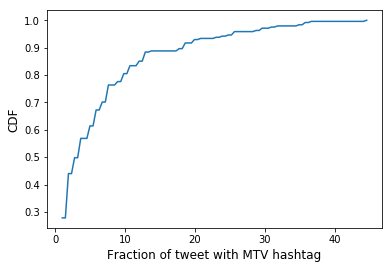

In [37]:
values, base = np.histogram(x,bins=100)
cumulative = np.cumsum(values/sum(values))
plt.plot(base[:-1], cumulative,label='suspicious users')
plt.xlabel('Fraction of tweet with MTV hashtag', fontsize = 12)
plt.ylabel('CDF', fontsize = 12)
plt.show()

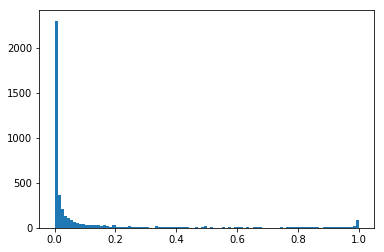

In [9]:
#plt.figure(figsize=(16,16))
#plt.scatter(x,y)
plt.hist(x,bins=100)
plt.show()

In [170]:
df_user_havetweeted_with_MTVhashtag['number_of_tweet_with_MTVhashtag']=list_user_number_of_tweet_with_MTVhashtag

In [162]:
NormalUser_path='D:\\MEGA\\NormalUsers\\'
list_user_number_of_tweet_with_MTVhashtag=[]

for onefilename in df_user_havetweeted_with_MTVhashtag['user_id']:
    tweets=open(NormalUser_path+'TweetsFromUser_'+onefilename+'.txt', 'r', encoding='UTF-8', errors='ignore')
    numberoftweetwithMTVhashtag=0
    for line in tweets:
        tweet=json.loads(line)
        hashtags=[tweet['entities']['hashtags'][i]['text'] for i in range(len(tweet['entities']['hashtags']))]
        for onehashtag in hashtags:
            if onehashtag.lower() in MTV_allhashtags:
                numberoftweetwithMTVhashtag+=1
                break
    list_user_number_of_tweet_with_MTVhashtag.append(numberoftweetwithMTVhashtag)

### Train Model

In [126]:
X=df_user_havetweeted_with_MTVhashtag[['criterion1','criterion2','days_tweeted']]
y=df_user_havetweeted_with_MTVhashtag['isMTVbot']

In [121]:
classifier=GradientBoostingClassifier()

In [122]:
scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')

In [123]:
scores.mean()

0.99670283378369007

Use model to find MTV bot in Range 1

In [71]:
df_Range1=pd.read_pickle('df_Range1_alltweet.pkl')

In [76]:
df_Range1_6116user=df_Range1[['user_screen_name']].drop_duplicates().copy()

In [78]:
df_Range1_6116user=df_Range1_6116user.reset_index(drop=True)

In [81]:
df_Range1_6116user['number_of_tweet']=df_Range1_6116user.apply(lambda x: len(df_Range1[df_Range1['user_screen_name']==x['user_screen_name']]),axis=1)

In [92]:
list_user_number_of_tweet_with_MTVhashtag=[]
for user_name in df_Range1_6116user['user_screen_name']:
    numberoftweetwithMTVhashtag=0
    for hashtags in df_Range1[df_Range1['user_screen_name']==user_name]['hashtags']:
        for onehashtag in hashtags:
            if onehashtag.lower() in MTV_allhashtags:
                numberoftweetwithMTVhashtag+=1
                break
    list_user_number_of_tweet_with_MTVhashtag.append(numberoftweetwithMTVhashtag)

In [108]:
df_Range1_6116user['number_of_tweet_with_MTVhashtag']=list_user_number_of_tweet_with_MTVhashtag

In [110]:
list_user_number_of_tweet_with_hashtag=[]
for user_name in df_Range1_6116user['user_screen_name']:
    numberoftweetwithhashtag=0
    for hashtags in df_Range1[df_Range1['user_screen_name']==user_name]['hashtags']:
        if hashtags!=[]:
            numberoftweetwithhashtag+=1
    list_user_number_of_tweet_with_hashtag.append(numberoftweetwithhashtag)

In [111]:
df_Range1_6116user['number_of_tweet_with_hashtag']=list_user_number_of_tweet_with_hashtag

In [113]:
def find_days_tweeted(x):
    return len(set(list(df_Range1[df_Range1['user_screen_name']==x['user_screen_name']]['tweet_created_at'].map(lambda x: x.strftime('%Y-%m-%d')))))

In [114]:
df_Range1_6116user['days_tweeted']=df_Range1_6116user.apply(find_days_tweeted,axis=1)

In [116]:
df_Range1_6116user['criterion1']=df_Range1_6116user.apply(lambda x: (x['number_of_tweet_with_hashtag']/x['number_of_tweet']),axis=1)
df_Range1_6116user['criterion2']=df_Range1_6116user.apply(lambda x: (x['number_of_tweet_with_MTVhashtag']/x['number_of_tweet']),axis=1)

In [124]:
predict_X=df_Range1_6116user[['criterion1','criterion2','days_tweeted']]

In [127]:
classifier.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [128]:
predict_y=classifier.predict(predict_X)

In [130]:
df_Range1_6116user['isMTVbot']=predict_y

In [132]:
df_Range1_6116user[df_Range1_6116user['isMTVbot']==1]

,user_screen_name,number_of_tweet,number_of_tweet_with_MTVhashtag,number_of_tweet_with_hashtag,days_tweeted,criterion1,criterion2,isMTVbot
22,candlesandwifi,13,13,13,1,1.000000,1.000000,1
104,_hemmoshood,54,54,54,1,1.000000,1.000000,1
130,ashtraIianmgc,363,362,362,3,0.997245,0.997245,1
155,spamthingy,12,12,12,1,1.000000,1.000000,1
182,clsaved19,40,38,38,2,0.950000,0.950000,1
215,95sftzayn,55,55,55,2,1.000000,1.000000,1
282,ffvcktomlinsn,293,293,293,2,1.000000,1.000000,1
294,NllALL,8,8,8,1,1.000000,1.000000,1
337,naarryyy69,676,642,658,6,0.973373,0.949704,1
478,listentobiopls,81,74,74,2,0.913580,0.913580,1


In [146]:
aaa=list(df_user_havetweeted_with_MTVhashtag[df_user_havetweeted_with_MTVhashtag['isMTVbot']==1]['user_screen_name'])

In [147]:
bbb=list(df_Range1_6116user[df_Range1_6116user['isMTVbot']==1]['user_screen_name'])

In [153]:
Range1_overlapMTVbot=[]
for i in aaa:
    if i in bbb:
        Range1_overlapMTVbot.append(i)

In [154]:
len(Range1_overlapMTVbot)

14

Use model to find MTV bot in Range 2

In [198]:
df_Range2=pd.read_pickle('df_Range2_alltweet.pkl')

In [200]:
df_Range2_2572user=df_Range2[['user_screen_name']].drop_duplicates().copy()

In [201]:
df_Range2_2572user=df_Range2_2572user.reset_index(drop=True)

In [202]:
df_Range2_2572user['number_of_tweet']=df_Range2_2572user.apply(lambda x: len(df_Range2[df_Range2['user_screen_name']==x['user_screen_name']]),axis=1)

In [203]:
list_user_number_of_tweet_with_MTVhashtag=[]
for user_name in df_Range2_2572user['user_screen_name']:
    numberoftweetwithMTVhashtag=0
    for hashtags in df_Range2[df_Range2['user_screen_name']==user_name]['hashtags']:
        for onehashtag in hashtags:
            if onehashtag.lower() in MTV_allhashtags:
                numberoftweetwithMTVhashtag+=1
                break
    list_user_number_of_tweet_with_MTVhashtag.append(numberoftweetwithMTVhashtag)

In [204]:
df_Range2_2572user['number_of_tweet_with_MTVhashtag']=list_user_number_of_tweet_with_MTVhashtag

In [205]:
list_user_number_of_tweet_with_hashtag=[]
for user_name in df_Range2_2572user['user_screen_name']:
    numberoftweetwithhashtag=0
    for hashtags in df_Range2[df_Range2['user_screen_name']==user_name]['hashtags']:
        if hashtags!=[]:
            numberoftweetwithhashtag+=1
    list_user_number_of_tweet_with_hashtag.append(numberoftweetwithhashtag)

In [206]:
df_Range2_2572user['number_of_tweet_with_hashtag']=list_user_number_of_tweet_with_hashtag

In [207]:
def find_days_tweeted(x):
    return len(set(list(df_Range2[df_Range2['user_screen_name']==x['user_screen_name']]['tweet_created_at'].map(lambda x: x.strftime('%Y-%m-%d')))))

In [208]:
df_Range2_2572user['days_tweeted']=df_Range2_2572user.apply(find_days_tweeted,axis=1)

In [209]:
df_Range2_2572user['criterion1']=df_Range2_2572user.apply(lambda x: (x['number_of_tweet_with_hashtag']/x['number_of_tweet']),axis=1)
df_Range2_2572user['criterion2']=df_Range2_2572user.apply(lambda x: (x['number_of_tweet_with_MTVhashtag']/x['number_of_tweet']),axis=1)

In [210]:
predict_X=df_Range2_2572user[['criterion1','criterion2','days_tweeted']]

In [211]:
classifier.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [212]:
predict_y=classifier.predict(predict_X)

In [213]:
df_Range2_2572user['isMTVbot']=predict_y

In [215]:
len(df_Range2_2572user[df_Range2_2572user['isMTVbot']==1])

23

In [216]:
aaa=list(df_user_havetweeted_with_MTVhashtag[df_user_havetweeted_with_MTVhashtag['isMTVbot']==1]['user_screen_name'])

In [217]:
bbb=list(df_Range2_2572user[df_Range2_2572user['isMTVbot']==1]['user_screen_name'])

In [218]:
Range2_overlapMTVbot=[]
for i in aaa:
    if i in bbb:
        Range2_overlapMTVbot.append(i)

In [219]:
len(Range2_overlapMTVbot)

2

Use model to find MTV bot in Range 3

In [220]:
df_Range3=pd.read_pickle('df_Range3_alltweet.pkl')

In [222]:
df_Range3_1796user=df_Range3[['user_screen_name']].drop_duplicates().copy()

In [223]:
df_Range3_1796user=df_Range3_1796user.reset_index(drop=True)

In [224]:
df_Range3_1796user['number_of_tweet']=df_Range3_1796user.apply(lambda x: len(df_Range3[df_Range3['user_screen_name']==x['user_screen_name']]),axis=1)

In [225]:
list_user_number_of_tweet_with_MTVhashtag=[]
for user_name in df_Range3_1796user['user_screen_name']:
    numberoftweetwithMTVhashtag=0
    for hashtags in df_Range3[df_Range3['user_screen_name']==user_name]['hashtags']:
        for onehashtag in hashtags:
            if onehashtag.lower() in MTV_allhashtags:
                numberoftweetwithMTVhashtag+=1
                break
    list_user_number_of_tweet_with_MTVhashtag.append(numberoftweetwithMTVhashtag)

In [226]:
df_Range3_1796user['number_of_tweet_with_MTVhashtag']=list_user_number_of_tweet_with_MTVhashtag

In [227]:
list_user_number_of_tweet_with_hashtag=[]
for user_name in df_Range3_1796user['user_screen_name']:
    numberoftweetwithhashtag=0
    for hashtags in df_Range3[df_Range3['user_screen_name']==user_name]['hashtags']:
        if hashtags!=[]:
            numberoftweetwithhashtag+=1
    list_user_number_of_tweet_with_hashtag.append(numberoftweetwithhashtag)

In [228]:
df_Range3_1796user['number_of_tweet_with_hashtag']=list_user_number_of_tweet_with_hashtag

In [229]:
def find_days_tweeted(x):
    return len(set(list(df_Range3[df_Range3['user_screen_name']==x['user_screen_name']]['tweet_created_at'].map(lambda x: x.strftime('%Y-%m-%d')))))

In [230]:
df_Range3_1796user['days_tweeted']=df_Range3_1796user.apply(find_days_tweeted,axis=1)

In [231]:
df_Range3_1796user['criterion1']=df_Range3_1796user.apply(lambda x: (x['number_of_tweet_with_hashtag']/x['number_of_tweet']),axis=1)
df_Range3_1796user['criterion2']=df_Range3_1796user.apply(lambda x: (x['number_of_tweet_with_MTVhashtag']/x['number_of_tweet']),axis=1)

In [232]:
predict_X=df_Range3_1796user[['criterion1','criterion2','days_tweeted']]

In [233]:
classifier.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [234]:
predict_y=classifier.predict(predict_X)

In [235]:
df_Range3_1796user['isMTVbot']=predict_y

In [236]:
len(df_Range3_1796user[df_Range3_1796user['isMTVbot']==1])

142

In [241]:
len(df_Range3_1796user[[i>0.6 for i in df_Range3_1796user['criterion2']]])

149

In [242]:
aaa=list(df_user_havetweeted_with_MTVhashtag[df_user_havetweeted_with_MTVhashtag['isMTVbot']==1]['user_screen_name'])

In [243]:
bbb=list(df_Range3_1796user[df_Range3_1796user['isMTVbot']==1]['user_screen_name'])

In [244]:
Range3_overlapMTVbot=[]
for i in aaa:
    if i in bbb:
        Range3_overlapMTVbot.append(i)

In [245]:
len(Range3_overlapMTVbot)

11

### 分析Range1

In [2]:
df_Range1=pd.read_pickle('df_Range1_alltweet.pkl')
df_Range1_randomuser=pd.read_pickle('df_Range1_randomuser.pkl')

In [221]:
df_Range1['user_created_at']=df_Range1['user_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))
df_Range1['tweet_created_at']=df_Range1['tweet_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [ ]:
df_Range1_randomuser['user_created_at']=df_Range1_randomuser['user_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))
df_Range1_randomuser['tweet_created_at']=df_Range1_randomuser['tweet_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

### 从60万文件的后30万文件中找到满足0.8 0.8的用户，有3366个 代码错了

In [130]:
NormalUser_path='D:\\MEGA\\NormalUsers\\'
column_labels=['user_created_at','user_screen_name','user_id','tweet_created_at','hashtags']
df_allUser=[]
df_onefile=pd.DataFrame(columns=column_labels)
counter=0
for onefilename in files_name[300000:]:
    tweets=open(NormalUser_path+onefilename, 'r', encoding='UTF-8', errors='ignore')
    for line in tweets:
        tweet=json.loads(line)
        
        #if 'retweeted_status' in tweet:
        #    isretweet=1
        #else:
        #    isretweet=0
        #print(tweet['source']+'A')
        #source=re.findall('>.+<',tweet['source'])[0][1:-1]
        hashtags=[[tweet['entities']['hashtags'][i]['text'] for i in range(len(tweet['entities']['hashtags']))]]
        #mentions=[[(tweet['entities']['user_mentions'][i]['id_str'],tweet['entities']['user_mentions'][i]['screen_name']) for i in range(len(tweet['entities']['user_mentions']))]]
        
        temp_df=pd.DataFrame(data={'user_created_at':tweet['user']['created_at'],'user_screen_name':tweet['user']['screen_name'],'user_id':tweet['user']['id_str'],'tweet_created_at':tweet['created_at'],'hashtags':hashtags},columns=column_labels)
        df_onefile=df_onefile.append(temp_df,ignore_index=True)
        
    
    tempdf=df_onefile
    if len(tempdf)==0:
        continue
    
    #带#话题的tweet数占这个用户总tweet数的比例
    number_of_tweet_with_hashtag=len(tempdf[[len(i)!=0 for i in tempdf['hashtags']]])
    number_of_tweet=len(tempdf)
    
    #top hashtag 的数量/tweet总数的比例
    temp_dict=collections.defaultdict(int)
    for i in tempdf['hashtags']:
        for j in i:
            temp_dict[j]+=1
    temp_dict_key_list = sorted(temp_dict, key=lambda x:temp_dict[x],reverse=True)
    sorted_temp_dict={x:temp_dict[x] for x in temp_dict_key_list}
    if len(sorted_temp_dict)>0:
        (top_hashtag,top_hashtag_count)=list(sorted_temp_dict.items())[0]
    else:
        continue
    
    #判断
    if((number_of_tweet_with_hashtag/number_of_tweet)>0.8 and (top_hashtag_count/number_of_tweet)>0.8):
        df_allUser.append((tweet['user']['screen_name'],tweet['user']['id_str'],onefilename,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag,top_hashtag_count))
    
    df_onefile=pd.DataFrame(columns=column_labels)
    counter+=1
    if(counter==10000):
        print('10000')
        counter=0

10000
10000
10000
10000
10000
10000


In [210]:
df_meet_criterion=pd.DataFrame(data=usersfrom300000,columns=['user_screen_name','user_id','file_name','number_of_tweet_with_hashtag','number_of_tweet','top_hashtag','top_hashtag_count'])

In [351]:
df_meet_criterion

,user_screen_name,user_id,top_hashtag,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,criterion1,criterion2
0,katy_guevara,599449110,nowplaying,1,1,1,1.000000,1.000000
1,jahlamari_,599948934,boyfriend,1,1,1,1.000000,1.000000
2,mericoarnezogbu,599952795,AshesToAshes,1,1,1,1.000000,1.000000
3,JamesDArmetta,600162151,SpeakeasyCHI,1,1,1,1.000000,1.000000
4,Elliottgordon2,600363343,sounlikeme,1,1,1,1.000000,1.000000
5,BurgerNick443,600535387,PetHotel,6,7,6,0.857143,0.857143
6,Like_THE_BossPA,600585558,Project,1,1,1,1.000000,1.000000
7,naynaysgma,600631065,Androidgames,72,76,71,0.947368,0.934211
8,OlveraMuoz,600989218,MeGustasPor,30,32,30,0.937500,0.937500
9,ScottSimone1,601144020,rageofbahamut,100,100,100,1.000000,1.000000


In [251]:
df_meet_criterion['criterion1']=df_meet_criterion.apply(lambda x: (x['number_of_tweet_with_hashtag']/x['number_of_tweet']),axis=1)
df_meet_criterion['criterion2']=df_meet_criterion.apply(lambda x: (x['top_hashtag_count']/x['number_of_tweet']),axis=1)

In [160]:
df_allUser

[('katy_guevara',
  '599449110',
  'TweetsFromUser_599449110.txt',
  1,
  1,
  'nowplaying',
  1),
 ('jahlamari_',
  '599948934',
  'TweetsFromUser_599948934.txt',
  1,
  1,
  'boyfriend',
  1),
 ('mericoarnezogbu',
  '599952795',
  'TweetsFromUser_599952795.txt',
  1,
  1,
  'AshesToAshes',
  1),
 ('JamesDArmetta',
  '600162151',
  'TweetsFromUser_600162151.txt',
  1,
  1,
  'SpeakeasyCHI',
  1),
 ('Elliottgordon2',
  '600363343',
  'TweetsFromUser_600363343.txt',
  1,
  1,
  'sounlikeme',
  1),
 ('BurgerNick443',
  '600535387',
  'TweetsFromUser_600535387.txt',
  6,
  7,
  'PetHotel',
  6),
 ('Like_THE_BossPA',
  '600585558',
  'TweetsFromUser_600585558.txt',
  1,
  1,
  'Project',
  1),
 ('naynaysgma',
  '600631065',
  'TweetsFromUser_600631065.txt',
  72,
  76,
  'Androidgames',
  71),
 ('OlveraMuoz',
  '600989218',
  'TweetsFromUser_600989218.txt',
  30,
  32,
  'MeGustasPor',
  30),
 ('ScottSimone1',
  '601144020',
  'TweetsFromUser_601144020.txt',
  100,
  100,
  'rageofbahamut'

In [198]:
np.save('300000users0.80.8.npy',np.array(df_allUser))

In [199]:
usersfrom300000np=np.load('300000users0.80.8.npy')

In [200]:
usersfrom300000=usersfrom300000np.tolist()
for i in usersfrom300000:
    i[3]=int(i[3])
    i[4]=int(i[4])
    i[6]=int(i[6])

In [209]:
usersfrom300000

[['katy_guevara',
  '599449110',
  'TweetsFromUser_599449110.txt',
  1,
  1,
  'nowplaying',
  1],
 ['jahlamari_',
  '599948934',
  'TweetsFromUser_599948934.txt',
  1,
  1,
  'boyfriend',
  1],
 ['mericoarnezogbu',
  '599952795',
  'TweetsFromUser_599952795.txt',
  1,
  1,
  'AshesToAshes',
  1],
 ['JamesDArmetta',
  '600162151',
  'TweetsFromUser_600162151.txt',
  1,
  1,
  'SpeakeasyCHI',
  1],
 ['Elliottgordon2',
  '600363343',
  'TweetsFromUser_600363343.txt',
  1,
  1,
  'sounlikeme',
  1],
 ['BurgerNick443',
  '600535387',
  'TweetsFromUser_600535387.txt',
  6,
  7,
  'PetHotel',
  6],
 ['Like_THE_BossPA',
  '600585558',
  'TweetsFromUser_600585558.txt',
  1,
  1,
  'Project',
  1],
 ['naynaysgma',
  '600631065',
  'TweetsFromUser_600631065.txt',
  72,
  76,
  'Androidgames',
  71],
 ['OlveraMuoz',
  '600989218',
  'TweetsFromUser_600989218.txt',
  30,
  32,
  'MeGustasPor',
  30],
 ['ScottSimone1',
  '601144020',
  'TweetsFromUser_601144020.txt',
  100,
  100,
  'rageofbahamut'

In [43]:
detected_MTVbot=[]
for user in suspicious_user_screen_name:
    tempdf=df_Range1[df_Range1['user_screen_name']==user]
    
    #带#话题的tweet数占这个用户总tweet数的比例
    number_of_tweet_with_hashtag=len(tempdf[[len(i)!=0 for i in tempdf['hashtags']]])
    number_of_tweet=len(tempdf)
    
    #top hashtag 的数量/tweet总数的比例
    temp_dict=collections.defaultdict(int)
    for i in tempdf['hashtags']:
        for j in i:
            temp_dict[j]+=1
    temp_dict_key_list = sorted(temp_dict, key=lambda x:temp_dict[x],reverse=True)
    sorted_temp_dict={x:temp_dict[x] for x in temp_dict_key_list}
    if len(sorted_temp_dict)>0:
        (top_hashtag,top_hashtag_count)=list(sorted_temp_dict.items())[0]
    else:
        continue
    
    #判断
    if((number_of_tweet_with_hashtag/number_of_tweet)>0.8 and (top_hashtag_count/number_of_tweet)>0.8):
        detected_MTVbot.append((user,top_hashtag))

In [260]:
detected_MTVbot

[('july18th2014', 'snapshot'),
 ('candlesandwifi', 'MTVHottest'),
 ('UAAP_ACTION', 'UAAP77'),
 ('ScfMason', 'backhome'),
 ('maraamsaud_1359', '??????'),
 ('gieowwang26', '???'),
 ('HannahCrosswell', 'MH17'),
 ('_hemmoshood', 'MTVHottest'),
 ('ashtraIianmgc', 'MTVHottest'),
 ('040430fd8de74c3', 'androidgames'),
 ('spamthingy', 'MTVHottest'),
 ('dratnanda', 'exhausted'),
 ('jared24189', 'highwayrider'),
 ('clsaved19', 'MTVHottest'),
 ('casvanylazpedro', 'SidikLoveTini'),
 ('jayau242', 'android'),
 ('95sftzayn', 'MTVHottest'),
 ('titens63', 'SHOUTOUT'),
 ('Lilmissjaylaxo', 'FreePalestine'),
 ('ffvcktomlinsn', 'MTVHottest'),
 ('NllALL', 'MTVHottest'),
 ('littlemintx', 'TeenChoiceAwards'),
 ('naarryyy69', 'MTVHottest'),
 ('nafeesahraatib', '??????'),
 ('ttttttttttggbnk', 'CSRClassics'),
 ('manasnayak236', '??????'),
 ('kiranshah434', 'GoingPlacesComstorUAE'),
 ('AileenRosario22', 'arianatorshelparianators'),
 ('listentobiopls', 'MTVHottest'),
 ('Nicoleyayz', '20DaysofDead'),
 ('jcjv6', 'MTV

In [67]:
MTVbot_screen_name=['votefor5sos16','flockacalum','livhemmo99','michaelcutout','demonedhemmo','Horriblehemmo','icinghemmox','lostboi5sos','vote5sos_voting','mtvvotefivesos','CliffordxxCutie','cazr1999','votingaccountye','zaynisgodx','2Vote5sos','hemmings4444444','lustniams','5sosmtvotingacc','washoutluke','UNPREDlCTABL3','nataliemofo','5sos_spam_wefab','vote5sosORDIExx','GabbyJ11502','nataliemofo','5sosfermich','nataliehoodcx','GTFOASH','FuckinVote5sos','flavvedd','michaelsbxxbs6','SoundropR','gghuuyt','vma5sos22','DestinyJxjzjzjz']

In [75]:
len(MTVbot_screen_name)

35

In [69]:
detected_screen_name=[i for (i,j) in detected_MTVbot]

In [89]:
for i in MTVbot_screen_name:
    if i not in detected_screen_name:
        print('not in'+' '+i)

not in 5sosmtvotingacc


In [48]:
detected_MTVbot_dict=collections.defaultdict(int)
for (user,top_hashtag) in detected_MTVbot:
    detected_MTVbot_dict[top_hashtag]+=1

In [62]:
detected_MTVbot_dict_key_list = sorted(detected_MTVbot_dict, key=lambda x:detected_MTVbot_dict[x],reverse=True)
sorted_detected_MTVbot_dict={x:detected_MTVbot_dict[x] for x in detected_MTVbot_dict_key_list}
list(sorted_detected_MTVbot_dict.items())

[('vote5sos', 69),
 ('MTVHottest', 52),
 ('votedemilovato', 38),
 ('CSRRacing', 15),
 ('CSRClassics', 11),
 ('MereBearsBacktoSchool', 8),
 ('CallMeCam', 6),
 ('?????????', 6),
 ('androidgames', 5),
 ('????', 5),
 ('voteaustinmahone', 5),
 ('??????', 4),
 ('iphonegames', 4),
 ('android', 3),
 ('KzoomPhonetography', 3),
 ('FacetimeMeCam', 3),
 ('TheJustinFlynnINTL', 3),
 ('ChopperFTW', 3),
 ('???', 2),
 ('TeenChoiceAwards', 2),
 ('???????', 2),
 ('followmenash', 2),
 ('FIFA', 2),
 ('listia', 2),
 ('1DKiss985', 2),
 ('?????', 2),
 ('ipadgames', 2),
 ('VoteMattTCA', 2),
 ('?????????????????', 2),
 ('merebearsbacktoschool', 2),
 ('VoteDemiLovato', 2),
 ('votearianagrande', 2),
 ('myfirstTweet', 2),
 ('snapshot', 1),
 ('UAAP77', 1),
 ('backhome', 1),
 ('MH17', 1),
 ('exhausted', 1),
 ('highwayrider', 1),
 ('SidikLoveTini', 1),
 ('SHOUTOUT', 1),
 ('FreePalestine', 1),
 ('GoingPlacesComstorUAE', 1),
 ('arianatorshelparianators', 1),
 ('20DaysofDead', 1),
 ('openfollow', 1),
 ('job', 1),
 ('???

In [405]:
df_Range1

,user_created_at,user_screen_name,user_id,source,tweet_created_at,text,hashtags,mentions,tweet_lang,isretweet
0,Sat Jul 27 08:35:56 +0000 2013,yunusdoc,1625012059,Twitter Web Client,Sat Jul 19 09:06:06 +0000 2014,"Obama opens his mouth for MH17 families,,Its g...",[],[],en,0
1,Sat Jul 27 08:35:56 +0000 2013,yunusdoc,1625012059,Twitter Web Client,Sat Jul 19 08:56:03 +0000 2014,Killing innocents doesn't solve the problem it...,[],[],en,0
2,Sat Jul 27 08:35:56 +0000 2013,yunusdoc,1625012059,Twitter Web Client,Sat Jul 19 08:46:41 +0000 2014,Great sorrow &amp; praying for those who lost ...,[],[],en,0
3,Fri Jul 18 17:51:00 +0000 2014,debbiamzhcz,2657297066,Mobile Web (M2),Sat Jul 19 19:22:28 +0000 2014,??? ???????? ?? ???? ????? ?????? ?? ??? ???? ...,[],[],ar,0
4,Fri Jul 18 17:51:00 +0000 2014,debbiamzhcz,2657297066,Mobile Web (M2),Sat Jul 19 19:21:36 +0000 2014,?????? ??????? ??????????? ??????? .. ?? ?????...,[],[],ar,0
5,Fri Jul 18 17:51:00 +0000 2014,debbiamzhcz,2657297066,Mobile Web (M2),Sat Jul 19 19:21:17 +0000 2014,????? ???? ?? ???? ( ????? ) ????? ??? ??? ( ?...,[],[],ar,0
6,Fri Jul 18 17:51:00 +0000 2014,debbiamzhcz,2657297066,Mobile Web (M2),Sat Jul 19 19:20:51 +0000 2014,?? ??? ?? ?????? ????? ?????? ?? ????? ???????,[],[],ar,0
7,Fri Jul 18 17:51:00 +0000 2014,debbiamzhcz,2657297066,Mobile Web (M2),Sat Jul 19 19:20:17 +0000 2014,??? ???? ???? ?(??? ????? ???? ???? ???? ???? ...,[],[],ar,0
8,Sat Jul 19 03:28:47 +0000 2014,july18th2014,2658538328,Twitter for Websites,Sat Jul 19 05:21:17 +0000 2014,I took a #snapshot of @MaddieDoeee on @younow!...,[snapshot],"[(1455375271, MaddieDoeee), (321396759, YouNow)]",en,0
9,Sat Jul 19 03:28:47 +0000 2014,july18th2014,2658538328,Twitter for Websites,Sat Jul 19 05:12:46 +0000 2014,I took a #snapshot of PhemaleWeezy on @younow!...,[snapshot],"[(321396759, YouNow)]",en,0


In [291]:
'lolurnotla' in list(df_Range1['user_screen_name'].drop_duplicates())

True

In [90]:
tempdf=df_Range1[df_Range1['user_screen_name']=='titens63']
temp_dict=collections.defaultdict(int)
for i in tempdf['hashtags']:
    for j in i:
        temp_dict[j]+=1
temp_dict_key_list = sorted(temp_dict, key=lambda x:temp_dict[x],reverse=True)
sorted_temp_dict={x:temp_dict[x] for x in temp_dict_key_list}
list(sorted_temp_dict.items())

[('SHOUTOUT', 1), ('FOLLOW4FOLLOW', 1), ('RT', 1)]

In [1622]:
print(sum(sorted_temp_dict.values()))

426


每天发多少条tweet

In [1623]:
temp_dict2=collections.defaultdict(int)
for i in tempdf['tweet_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    temp_dict2[datetime_string]+=1
list(temp_dict2.items())

[('2014-08-24', 408)]

这个人发过的最多的hashtag，每天发多少条带这种hashtag的tweet

In [1624]:
temp_dict3=collections.defaultdict(int)
(top_hashtag,top_hashtag_count)=list(sorted_temp_dict.items())[0]
tempdf2=tempdf[[top_hashtag in i for i in tempdf['hashtags']]]
for i in tempdf2['tweet_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    temp_dict3[datetime_string]+=1
list(temp_dict3.items())

[('2014-08-24', 336)]

In [1603]:
sum([j for (i,j) in temp_dict3.items()])

532

In [91]:
df_Range1[df_Range1['user_screen_name']=='titens63']

,user_created_at,user_screen_name,user_id,source,tweet_created_at,text,hashtags,mentions,tweet_lang,isretweet
2075,Thu Jul 10 13:19:38 +0000 2014,titens63,2615496427,Twitter for Android,Sat Jul 19 06:30:42 +0000 2014,RT @Follow_MeGain: RETWEET THIS IF YOU FOLLOW ...,"[SHOUTOUT, FOLLOW4FOLLOW, RT]","[(2399004074, Follow_MeGain)]",en,1


In [1627]:
max(df_Range1[df_Range1['user_screen_name']=='DestinyJxjzjzjz']['tweet_created_at'])

Timestamp('2014-08-24 23:34:24')

In [73]:
df_Range1[df_Range1['user_screen_name']=='5sosmtvotingacc']['isretweet'].value_counts()

1    151
0     73
Name: isretweet, dtype: int64

In [1629]:
df_Range1[['vote5sos' in i for i in df_Range1['hashtags']]][20000:20060]

,user_created_at,user_screen_name,user_id,source,tweet_created_at,text,hashtags,mentions,tweet_lang,isretweet
215643,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:14:18,I'm just going to post as many as these things...,[vote5sos],[],en,0
215644,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:14:12,I'm just going to post as many as these things...,[vote5sos],[],en,0
215645,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:14:08,I'm just going to post as many as these things...,[vote5sos],[],en,0
215646,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:14:04,I'm just going to post as many as these things...,[vote5sos],[],en,0
215647,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:14:00,I'm just going to post as many as these things...,[vote5sos],[],en,0
215648,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:13:57,I'm just going to post as many as these things...,[vote5sos],[],en,0
215649,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:13:53,I'm just going to post as many as these things...,[vote5sos],[],en,0
215650,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:13:46,I'm just going to post as many as these things...,[vote5sos],[],en,0
215651,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:13:41,I'm just going to post as many as these things...,[vote5sos],[],en,0
215652,2014-08-16 19:53:01,5sos_spam_wefab,2737967322,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",2014-08-24 06:13:35,I'm just going to post as many as these things...,[vote5sos],[],en,0


not_MTVbot=['KaferureoN','jillminda','5secofhemmings_','mollybye5','JuneLeeIsDaShit','35_805','IqSaleem','fairydustbutera','ItsCalumTbh','I_C_U_P_69','sleepinmichael','stoochalexramos','highonmybizzle']

MTVbot_screen_name=['votefor5sos16','flockacalum','livhemmo99','michaelcutout','demonedhemmo','Horriblehemmo','icinghemmox','lostboi5sos','vote5sos_voting','mtvvotefivesos','CliffordxxCutie','cazr1999','votingaccountye','zaynisgodx','2Vote5sos','hemmings4444444','lustniams','5sosmtvotingacc','washoutluke','UNPREDlCTABL3','nataliemofo','5sos_spam_wefab','vote5sosORDIExx','GabbyJ11502','nataliemofo','5sosfermich','nataliehoodcx','GTFOASH','FuckinVote5sos','flavvedd','michaelsbxxbs6','SoundropR','gghuuyt','vma5sos22','DestinyJxjzjzjz']

In [228]:
manual_MTVbot=pd.DataFrame(columns=['user_screen_name','user_id','top_hashtag','number_of_tweet_with_hashtag','number_of_tweet','top_hashtag_count','crriterion1','criterion2'])
for user in MTVbot_screen_name:
    tempdf=df_Range1[df_Range1['user_screen_name']==user]
    
    #带#话题的tweet数占这个用户总tweet数的比例
    number_of_tweet_with_hashtag=len(tempdf[[len(i)!=0 for i in tempdf['hashtags']]])
    number_of_tweet=len(tempdf)
    
    #top hashtag 的数量/tweet总数的比例
    temp_dict=collections.defaultdict(int)
    for i in tempdf['hashtags']:
        for j in i:
            temp_dict[j]+=1
    temp_dict_key_list = sorted(temp_dict, key=lambda x:temp_dict[x],reverse=True)
    sorted_temp_dict={x:temp_dict[x] for x in temp_dict_key_list}
    if len(sorted_temp_dict)>0:
        (top_hashtag,top_hashtag_count)=list(sorted_temp_dict.items())[0]
    else:
        continue
    
    #判断
    #if((number_of_tweet_with_hashtag/number_of_tweet)>0.8 and (top_hashtag_count/number_of_tweet)>0.8):
    manual_MTVbot=manual_MTVbot.append(pd.DataFrame(data=[[tempdf['user_screen_name'].iloc[0],tempdf['user_id'].iloc[0],top_hashtag,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,(number_of_tweet_with_hashtag/number_of_tweet),(top_hashtag_count/number_of_tweet)]],columns=['user_screen_name','user_id','top_hashtag','number_of_tweet_with_hashtag','number_of_tweet','top_hashtag_count','crriterion1','criterion2']),ignore_index=True)

In [229]:
manual_MTVbot#有一个bot用户特殊，一部分hashtag拼错了，造成criterion0.6

,user_screen_name,user_id,top_hashtag,number_of_tweet_with_hashtag,number_of_tweet,top_hashtag_count,crriterion1,criterion2
0,votefor5sos16,2750564387,vote5sos,339,349,337,0.971347,0.965616
1,flockacalum,2718757412,vote5sos,343,352,341,0.974432,0.968750
2,livhemmo99,2732362142,vote5sos,766,766,766,1.000000,1.000000
3,michaelcutout,2761530036,vote5sos,194,197,196,0.984772,0.994924
4,demonedhemmo,2730588666,vote5sos,210,210,207,1.000000,0.985714
5,Horriblehemmo,1599601052,vote5sos,124,124,122,1.000000,0.983871
6,icinghemmox,2657851509,vote5sos,247,249,247,0.991968,0.991968
7,lostboi5sos,2743868081,vote5sos,270,271,246,0.996310,0.907749
8,vote5sos_voting,2743327119,vote5sos,253,254,251,0.996063,0.988189
9,mtvvotefivesos,2743637771,vote5sos,277,277,284,1.000000,1.025271


votefor5sos16 8-23 (8-23 8-24) 2 days
flockacalum 8-09 (8-14 8-21) 4 days
livhemmo99 8-14 (8-14 8-24) 5 days 没有retweet
michaelcutout 8-24 (8-24 8-24) 1 day
demonedhemmo 8-14 (8-14 8-14) 1 day
Horriblehemmo 2013-7-17 (2014-8-14 2014-8-21) 2 days
icinghemmox 6-30 (8-14 8-16) 2 days 没有retweet
lostboi5sos 8-15 (8-15 8-15) 1 day
vote5sos_voting 8-15 (8-15 8-15) 1 day %70retweet
mtvvotefivesos 8-15 (8-15 8-15) 1 day retweet>90%
CliffordxxCutie 8-10 (8-10 8-15) 3 days retweet>90%
cazr1999 8-15 (8-15 8-24) 8 days retweet>90%
votingaccountye 8-16 (8-16 8-20) 4 days
zaynisgodx 8-13 (8-16 8-23) 3 days
2Vote5sos 8-16 (8-16 8-16) 1 day tweet数只有7条
hemmings4444444 8-10 (8-16 8-24) 3 days
lustniams 8-13 (8-13 8-23) 4 days
5sosmtvotingacc 8-16 (8-16 8-24) 5 days
washoutluke 4-27 (8-16 8-24) 4 days
UNPREDlCTABL3 2013-06-30 (8-16 8-20) 2 days
nataliemofo 6-24 (8-16 8-23) 5 days
5sos_spam_wefab 8-16 (8-16 8-24) 9 days
vote5sosORDIExx 8-18 (8-18 8-22) 5 days
GabbyJ11502 5-15 (8-17 8-18) 2 days
nataliemofo 6-24 (8-16 8-23) 5 days
5sosfermich 8-18 (8-18 8-21) 4 days
nataliehoodcx 8-19 (8-19 8-24) 2 days
GTFOASH 7-11 (8-17 8-20) 2 days
FuckinVote5sos 8-18 (8-18 8-24) 7 days
flavvedd 8-23 (8-23 8-23) 1 day
michaelsbxxbs6 8-23 (8-23 8-23) 1 day
SoundropR 7-30 (8-23 8-23) 2 days
gghuuyt 8-24 (8-24 8-24) 2 days
vma5sos22 8-24 (8-24 8-24) 1 day
DestinyJxjzjzjz 8-24 (8-24 8-24) 1 day

#### df_Range1 with hashtags 163990rows

In [982]:
df_Range1['user_created_at']=df_Range1['user_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [983]:
df_Range1['tweet_created_at']=df_Range1['tweet_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [66]:
df_Range2.loc[0,'tweet_created_at']<df_Range1.loc[0,'tweet_created_at']

True

In [71]:
min(df_Range1['tweet_created_at'])

Timestamp('2014-07-19 00:05:10')

In [70]:
max(df_Range1['tweet_created_at'])

Timestamp('2014-08-24 23:57:21')

In [220]:
dict_Range1_tweet_created_at=collections.defaultdict(int)
for i in df_Range1['tweet_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    dict_Range1_tweet_created_at[datetime_string]+=1

In [221]:
dict_Range1_tweet_created_at

defaultdict(int,
            {'2014-07-19': 2650,
             '2014-07-20': 2319,
             '2014-07-21': 2637,
             '2014-07-22': 6711,
             '2014-07-23': 4481,
             '2014-07-24': 2537,
             '2014-07-25': 2004,
             '2014-07-26': 2643,
             '2014-07-27': 2082,
             '2014-07-28': 1056,
             '2014-07-29': 1758,
             '2014-07-30': 1610,
             '2014-07-31': 2217,
             '2014-08-01': 3540,
             '2014-08-02': 4648,
             '2014-08-03': 3526,
             '2014-08-04': 2417,
             '2014-08-05': 1190,
             '2014-08-06': 818,
             '2014-08-07': 1434,
             '2014-08-08': 920,
             '2014-08-09': 1230,
             '2014-08-10': 1096,
             '2014-08-11': 1687,
             '2014-08-12': 2069,
             '2014-08-13': 1647,
             '2014-08-14': 5750,
             '2014-08-15': 8706,
             '2014-08-16': 4074,
             '2014-08-17': 6

In [280]:
x=list(dict_Range1_tweet_created_at.keys())

In [281]:
y=list(dict_Range1_tweet_created_at.values())

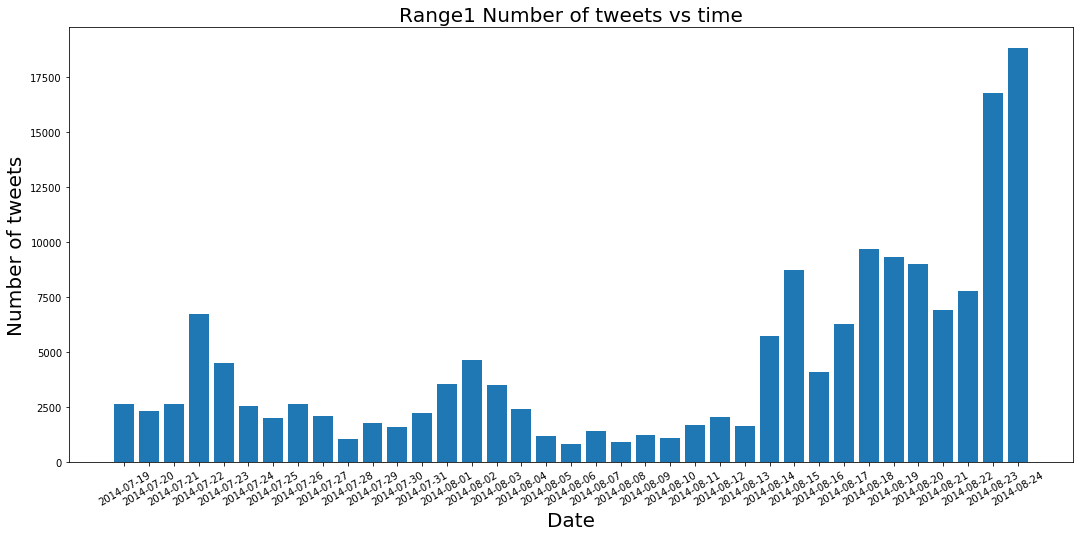

In [287]:
#plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.figure(figsize=(18,8))
plt.bar(x,y)

#plt.xlim(0,18)
plt.xticks(rotation=30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.title("Range1 Number of tweets vs time", fontsize = 20)
plt.show()

In [419]:
aaa=df_Range1[['user_created_at','user_screen_name']].drop_duplicates()

In [448]:
dict_Range1_user_created_at=collections.defaultdict(int)
for i in aaa['user_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    dict_Range1_user_created_at[datetime_string]+=1

In [457]:
x=list(dict_Range1_user_created_at.keys())

In [651]:
y=list(dict_Range1_user_created_at.values())

In [476]:
sorted_x=sorted(x)

In [432]:
np.arange(0, 320, 5)

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320])

In [487]:
sorted_y=[dict_Range1_user_created_at[i] for i in sorted_x]

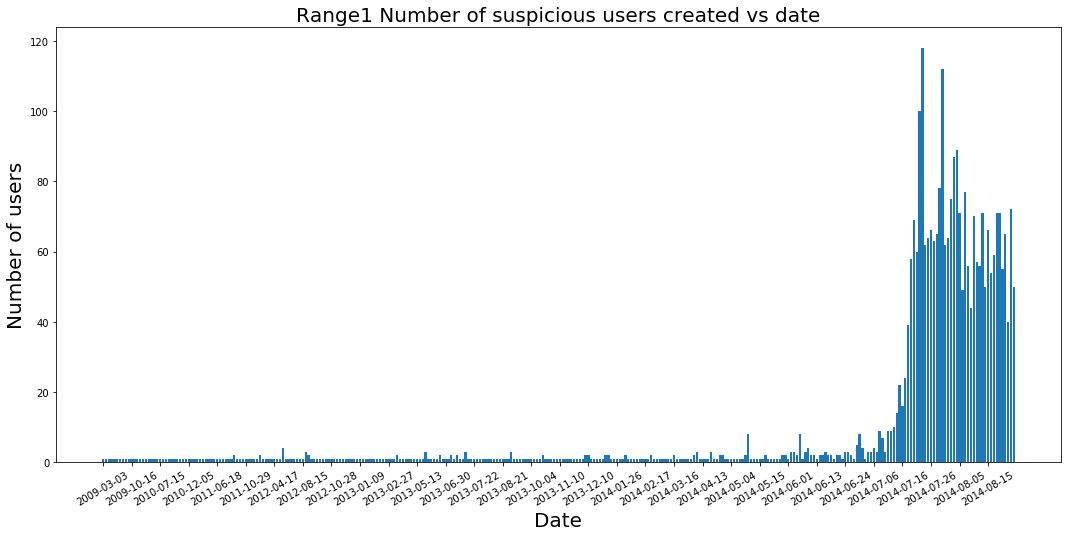

In [488]:
#plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.figure(figsize=(18,8))
plt.bar(sorted_x,sorted_y)

#plt.xlim(0,18)
plt.xticks(np.arange(0, 320, 10),[sorted_x[i] for i in range(0,320,10)],rotation=30)
#plt.xticks(rotation=90)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of users', fontsize = 20)
plt.title("Range1 Number of suspicious users created vs date", fontsize = 20)
plt.show()

In [408]:
min(df_Range1['user_created_at'])

Timestamp('2009-03-03 00:25:03')

In [409]:
max(df_Range1['user_created_at'])

Timestamp('2014-08-24 23:43:32')

#### Range 1 random Normal Users tweeted between 2014-07-19 and 2014-08-24

In [648]:
NormalUser_path='D:\\MEGA\\NormalUsers\\'

In [753]:
random_file_position=sorted(random.sample(range(0,606397),100000))

In [852]:
random_file_position

[2,
 11,
 19,
 25,
 39,
 40,
 41,
 43,
 54,
 67,
 80,
 82,
 91,
 92,
 94,
 99,
 101,
 104,
 107,
 108,
 109,
 115,
 123,
 124,
 134,
 135,
 143,
 154,
 159,
 165,
 183,
 192,
 194,
 207,
 213,
 214,
 222,
 250,
 253,
 255,
 256,
 263,
 266,
 278,
 280,
 281,
 290,
 293,
 304,
 321,
 331,
 341,
 347,
 360,
 364,
 368,
 375,
 378,
 384,
 390,
 391,
 392,
 395,
 412,
 414,
 421,
 435,
 438,
 465,
 468,
 471,
 475,
 491,
 502,
 503,
 515,
 517,
 518,
 521,
 534,
 537,
 538,
 555,
 563,
 578,
 581,
 588,
 592,
 596,
 608,
 625,
 643,
 644,
 646,
 651,
 670,
 672,
 674,
 683,
 687,
 689,
 695,
 705,
 706,
 708,
 717,
 721,
 728,
 732,
 735,
 738,
 740,
 748,
 751,
 752,
 761,
 769,
 773,
 775,
 780,
 782,
 793,
 804,
 807,
 808,
 816,
 818,
 827,
 834,
 836,
 838,
 851,
 852,
 855,
 857,
 861,
 862,
 865,
 886,
 889,
 905,
 913,
 916,
 920,
 921,
 927,
 928,
 938,
 944,
 946,
 949,
 950,
 954,
 957,
 961,
 964,
 969,
 970,
 973,
 975,
 977,
 979,
 986,
 987,
 1001,
 1010,
 1011,
 1015,
 1020

In [754]:
df_Range1_NormalUser=pd.DataFrame(columns=column_labels)
df_onefile_NormalUser=pd.DataFrame(columns=column_labels)
list_df_Range1_NormalUser=[]
for i in random_file_position:
    tweets=open(NormalUser_path+files_name[i], 'r', encoding='UTF-8', errors='ignore')
    for line in tweets:
        tweet=json.loads(line)
        temp_tweet_time=datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y').strftime('%Y-%m-%d')
        if temp_tweet_time>='2014-07-19' and temp_tweet_time<='2014-08-24':
            temp_df=pd.DataFrame(data={'user_created_at':tweet['user']['created_at'],'user_screen_name':tweet['user']['screen_name'],'tweet_created_at':tweet['created_at'],'text':tweet['text'],'hashtags':tweet['entities']['hashtags']},columns=column_labels)
            df_onefile_NormalUser=df_onefile_NormalUser.append(temp_df,ignore_index=True)
    list_df_Range1_NormalUser.append(df_onefile_NormalUser.copy())
    df_onefile_NormalUser=pd.DataFrame(columns=column_labels)

for i in range(0,len(list_df_Range1_NormalUser)):
    df_Range1_NormalUser=df_Range1_NormalUser.append(list_df_Range1_NormalUser[i],ignore_index=True)

In [755]:
df_Range1_NormalUser['user_created_at']=df_Range1_NormalUser['user_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [756]:
df_Range1_NormalUser['tweet_created_at']=df_Range1_NormalUser['tweet_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [759]:
df_Range1_NormalUser

,user_created_at,user_screen_name,tweet_created_at,text,hashtags
0,2006-11-24 15:24:20,caxtonian,2014-08-08 15:20:13,RT @Porter_Anderson: How many publishers? In 2...,"{'text': 'FutureChat', 'indices': [102, 113]}"
1,2006-11-24 15:24:20,caxtonian,2014-08-08 15:20:06,RT @Porter_Anderson: It's thanks to @LJNDawson...,"{'text': 'FutureChat', 'indices': [125, 136]}"
2,2006-11-24 15:24:20,caxtonian,2014-08-08 15:16:45,RT @william1shaw: Unabridged CD audiobook of A...,"{'text': 'freebiefriday', 'indices': [139, 140]}"
3,2006-11-24 15:24:20,caxtonian,2014-08-08 11:36:44,RT @ModernToss: It's world cat day today. As i...,"{'text': 'WorldCatDay', 'indices': [97, 109]}"
4,2006-11-24 15:24:20,caxtonian,2014-08-07 07:47:48,"RT @mikejonestv: ""No fuckhead. You are not a S...","{'text': 'Museum', 'indices': [109, 116]}"
5,2006-11-24 15:24:20,caxtonian,2014-08-06 17:20:23,RT @bliink_: @bliink_ is #hiring ! We're looki...,"{'text': 'hiring', 'indices': [25, 32]}"
6,2006-11-24 15:24:20,caxtonian,2014-08-06 14:05:03,RT @MyriadEditions: It's #WorldBreastfeedingWe...,"{'text': 'WorldBreastfeedingWeek', 'indices': ..."
7,2006-11-24 15:24:20,caxtonian,2014-08-06 09:57:16,RT @myworld2015: Check out the @ILO InfoStorie...,"{'text': 'labour', 'indices': [77, 84]}"
8,2006-11-24 15:24:20,caxtonian,2014-08-06 07:11:00,RT @walkergallery: The visitor response to #gr...,"{'text': 'graysonatwalker', 'indices': [43, 59]}"
9,2006-11-24 15:24:20,caxtonian,2014-08-05 16:50:15,RT @tate_kids: Our wonderful winners of the #N...,"{'text': 'NoisyTate', 'indices': [44, 54]}"


In [752]:
df_Range1_NormalUser_small

,user_created_at,user_screen_name,tweet_created_at,text,hashtags
0,2006-11-24 15:24:20,caxtonian,2014-08-08 15:20:13,RT @Porter_Anderson: How many publishers? In 2...,"{'text': 'FutureChat', 'indices': [102, 113]}"
1,2006-11-24 15:24:20,caxtonian,2014-08-08 15:20:06,RT @Porter_Anderson: It's thanks to @LJNDawson...,"{'text': 'FutureChat', 'indices': [125, 136]}"
2,2006-11-24 15:24:20,caxtonian,2014-08-08 15:16:45,RT @william1shaw: Unabridged CD audiobook of A...,"{'text': 'freebiefriday', 'indices': [139, 140]}"
3,2006-11-24 15:24:20,caxtonian,2014-08-08 11:36:44,RT @ModernToss: It's world cat day today. As i...,"{'text': 'WorldCatDay', 'indices': [97, 109]}"
4,2006-11-24 15:24:20,caxtonian,2014-08-07 07:47:48,"RT @mikejonestv: ""No fuckhead. You are not a S...","{'text': 'Museum', 'indices': [109, 116]}"
5,2006-11-24 15:24:20,caxtonian,2014-08-06 17:20:23,RT @bliink_: @bliink_ is #hiring ! We're looki...,"{'text': 'hiring', 'indices': [25, 32]}"
6,2006-11-24 15:24:20,caxtonian,2014-08-06 14:05:03,RT @MyriadEditions: It's #WorldBreastfeedingWe...,"{'text': 'WorldBreastfeedingWeek', 'indices': ..."
7,2006-11-24 15:24:20,caxtonian,2014-08-06 09:57:16,RT @myworld2015: Check out the @ILO InfoStorie...,"{'text': 'labour', 'indices': [77, 84]}"
8,2006-11-24 15:24:20,caxtonian,2014-08-06 07:11:00,RT @walkergallery: The visitor response to #gr...,"{'text': 'graysonatwalker', 'indices': [43, 59]}"
9,2006-11-24 15:24:20,caxtonian,2014-08-05 16:50:15,RT @tate_kids: Our wonderful winners of the #N...,"{'text': 'NoisyTate', 'indices': [44, 54]}"


In [739]:
df_Range1_NormalUser[[i['text']=='votearianagrande' for i in df_Range1_NormalUser['hashtags']]]

,user_created_at,user_screen_name,tweet_created_at,text,hashtags
11335,2014-07-23 03:33:34,grandearmyxx,2014-08-22 21:35:56,RT @bonjourbuterax: moms #votearianagrande htt...,"{'text': 'votearianagrande', 'indices': [25, 42]}"
11336,2014-07-23 03:33:34,grandearmyxx,2014-08-22 18:19:13,RT @MrGrxnde: going to school freshman year vs...,"{'text': 'votearianagrande', 'indices': [60, 77]}"
11337,2014-07-23 03:33:34,grandearmyxx,2014-08-22 04:36:42,RT @ArianaGrandeWCW: I Painted This Last Week ...,"{'text': 'votearianagrande', 'indices': [86, 1..."
11344,2014-07-23 03:33:34,grandearmyxx,2014-08-20 17:43:16,RT @SparklyGrandeee: RT for 10 free follows #v...,"{'text': 'votearianagrande', 'indices': [44, 61]}"
11345,2014-07-23 03:33:34,grandearmyxx,2014-08-20 17:42:52,RT @LovinMissGrande: Is it just me or is My Ev...,"{'text': 'votearianagrande', 'indices': [93, 1..."
11346,2014-07-23 03:33:34,grandearmyxx,2014-08-20 17:42:38,"RT @ArianaGrandeWCW: queen of everything, clas...","{'text': 'votearianagrande', 'indices': [57, 74]}"
11347,2014-07-23 03:33:34,grandearmyxx,2014-08-20 17:42:34,RT @MineAriButera: Loves let's go vote #votear...,"{'text': 'votearianagrande', 'indices': [39, 56]}"
11348,2014-07-23 03:33:34,grandearmyxx,2014-08-20 17:42:28,RT @ArianaGrandeWCW: Really Wanna Hit 1k Follo...,"{'text': 'votearianagrande', 'indices': [73, 90]}"
11349,2014-07-23 03:33:34,grandearmyxx,2014-08-20 17:42:28,RT @ArianaGrandeWCW: Really Wanna Hit 1k Follo...,"{'text': 'votearianagrande', 'indices': [91, 1..."
11350,2014-07-23 03:33:34,grandearmyxx,2014-08-20 17:42:16,RT @exactlygrande: Ariana's cuddles looks like...,"{'text': 'votearianagrande', 'indices': [139, ..."


In [722]:
for i in df_Range3.index:
    if df_Range1.loc[i]['user_screen_name']=='grandearmyxx':
        print('find')

In [760]:
dict_Range1_NormalUser_tweet_created_at=collections.defaultdict(int)
for i in df_Range1_NormalUser['tweet_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    dict_Range1_NormalUser_tweet_created_at[datetime_string]+=1

In [761]:
x=list(dict_Range1_NormalUser_tweet_created_at.keys())

In [762]:
y=list(dict_Range1_NormalUser_tweet_created_at.values())

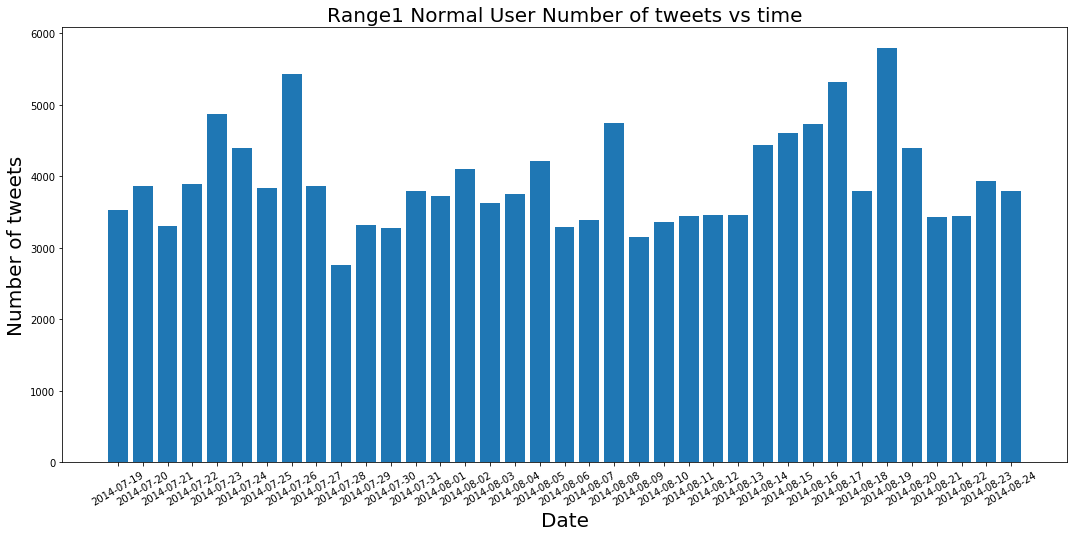

In [763]:
plt.figure(figsize=(18,8))
plt.bar(x,y)

plt.xticks(rotation=30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.title("Range1 Normal User Number of tweets vs time", fontsize = 20)
plt.show()

In [775]:
Range1_suspicious_user_screen_name=list(df_Range1[['user_created_at','user_screen_name']].drop_duplicates()['user_screen_name'])

In [776]:
Range2_suspicious_user_screen_name=list(df_Range2[['user_created_at','user_screen_name']].drop_duplicates()['user_screen_name'])

In [777]:
Range3_suspicious_user_screen_name=list(df_Range3[['user_created_at','user_screen_name']].drop_duplicates()['user_screen_name'])

In [781]:
suspicious_user_screen_name=Range1_suspicious_user_screen_name+Range2_suspicious_user_screen_name+Range3_suspicious_user_screen_name

In [818]:
Range1_allNormalUser=df_Range1_NormalUser[['user_created_at','user_screen_name']].drop_duplicates()

In [822]:
for i in range(0,len(Range1_allNormalUser)):
    if Range1_allNormalUser.loc[i,'user_screen_name'] in suspicious_user_screen_name:
        Range1_allNormalUser.drop(index=i,inplace=True)

In [820]:
Range1_allNormalUser=Range1_allNormalUser.reset_index(drop=True)

In [816]:
Range1_allNormalUser.drop(index=91,inplace=True)

In [823]:
Range1_allNormalUser

,user_created_at,user_screen_name
0,2006-11-24 15:24:20,caxtonian
1,2006-12-29 22:12:03,stephenanderson
2,2007-02-19 21:13:06,jd
3,2007-02-20 23:10:38,meiqimichelle
4,2007-03-28 23:48:34,SDTEKKEN
5,2007-03-29 12:31:46,statenjason
6,2007-04-05 18:23:07,pteichman
7,2007-04-13 15:43:24,leerayl
8,2007-04-18 19:37:50,themich
9,2007-04-18 20:41:31,Hectorivan


In [824]:
dict_Range1_NormalUser_user_created_at=collections.defaultdict(int)
for i in Range1_allNormalUser['user_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    dict_Range1_NormalUser_user_created_at[datetime_string]+=1

In [825]:
x=list(dict_Range1_NormalUser_user_created_at.keys())

In [826]:
y=list(dict_Range1_NormalUser_user_created_at.values())

In [827]:
sorted_x=sorted(x)

In [828]:
sorted_y=[dict_Range1_NormalUser_user_created_at[i] for i in sorted_x]

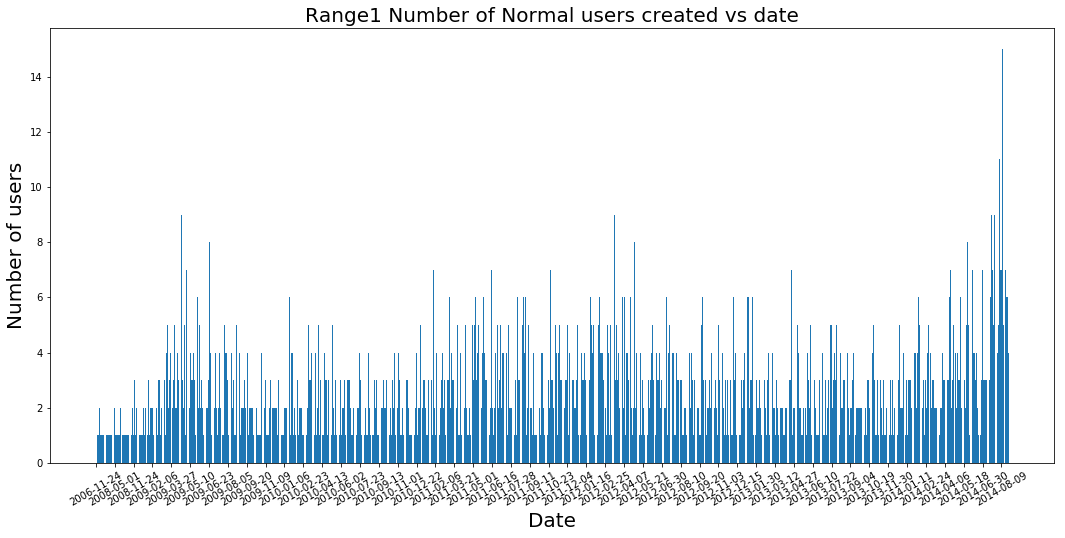

In [831]:
plt.figure(figsize=(18,8))
plt.bar(sorted_x,sorted_y)

plt.xticks(np.arange(0, len(sorted_x), 40),[sorted_x[i] for i in range(0,len(sorted_x),40)],rotation=30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of users', fontsize = 20)
plt.title("Range1 Number of Normal users created vs date", fontsize = 20)
plt.show()

In [843]:
dict_Range1_NormalUser_hashtags=collections.defaultdict(int)

for i in df_Range1_NormalUser['hashtags']:
    dict_Range1_NormalUser_hashtags[i['text']]+=1

In [838]:
dict_Range1_NormalUser_hashtags=collections.defaultdict(int)
for i in range(0,len(df_Range1_NormalUser)):
    if df_Range1_NormalUser.iloc[i,1] not in suspicious_user_screen_name:
        dict_Range1_NormalUser_hashtags[df_Range1_NormalUser.iloc[i,4]['text']]+=1

In [844]:
sorted_Range1_NormalUser_key_list = sorted(dict_Range1_NormalUser_hashtags, key=lambda x:dict_Range1_NormalUser_hashtags[x],reverse=True)
sorted_dict_Range1_hashtags={x:dict_Range1_NormalUser_hashtags[x] for x in sorted_Range1_NormalUser_key_list}

In [845]:
x=list(sorted_dict_Range1_hashtags.keys())[:20]

In [846]:
y=list(sorted_dict_Range1_hashtags.values())[:20]

In [833]:
##new suspicious users:grandearmyxx

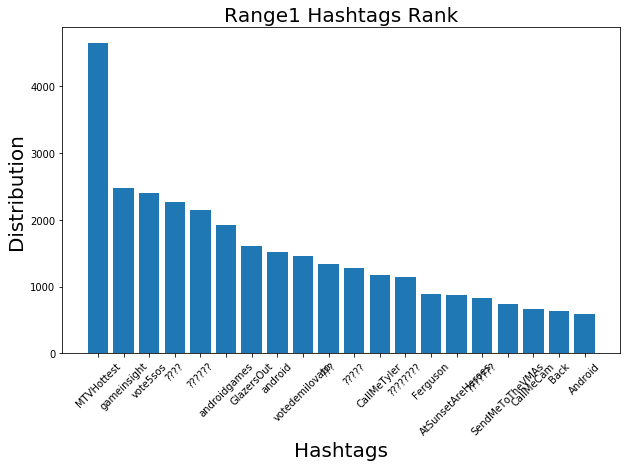

In [849]:
plt.figure(figsize=(10,6))
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.bar(np.arange(len(x)),y)

plt.xlabel('Hashtags', fontsize = 20)
plt.ylabel('Distribution', fontsize = 20)
plt.title("Range1 Hashtags Rank", fontsize = 20)
plt.show()

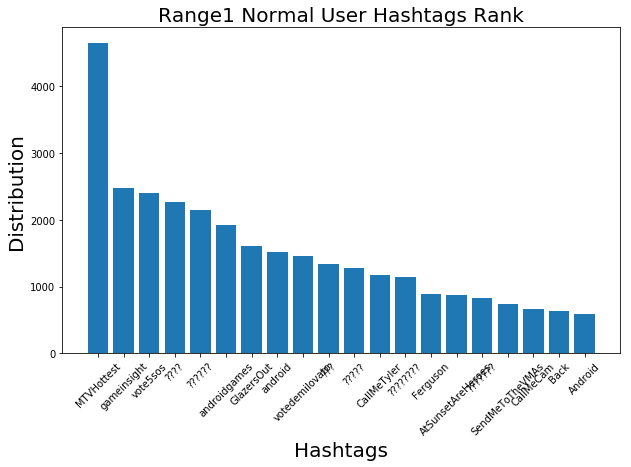

In [850]:
plt.figure(figsize=(10,6))
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.bar(np.arange(len(x)),y)

plt.xlabel('Hashtags', fontsize = 20)
plt.ylabel('Distribution', fontsize = 20)
plt.title("Range1 Normal User Hashtags Rank", fontsize = 20)
plt.show()

### df_Range2 with hashtags 24323rows

In [63]:
df_Range2['user_created_at']=df_Range2['user_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [64]:
df_Range2['tweet_created_at']=df_Range2['tweet_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [72]:
min(df_Range2['tweet_created_at'])

Timestamp('2013-03-12 00:00:22')

In [73]:
max(df_Range2['tweet_created_at'])

Timestamp('2013-03-27 23:56:41')

In [218]:
dict_Range2_tweet_created_at=collections.defaultdict(int)
for i in df_Range2['tweet_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    dict_Range2_tweet_created_at[datetime_string]+=1

In [219]:
dict_Range2_tweet_created_at

defaultdict(int,
            {'2013-03-12': 4954,
             '2013-03-13': 1070,
             '2013-03-14': 1061,
             '2013-03-15': 5139,
             '2013-03-16': 4506,
             '2013-03-17': 6377,
             '2013-03-18': 5346,
             '2013-03-19': 3663,
             '2013-03-20': 2167,
             '2013-03-21': 3698,
             '2013-03-22': 1129,
             '2013-03-23': 5327,
             '2013-03-24': 1423,
             '2013-03-25': 1734,
             '2013-03-26': 8237,
             '2013-03-27': 3794})

In [263]:
x=list(dict_Range2_tweet_created_at.keys())

In [264]:
y=list(dict_Range2_tweet_created_at.values())

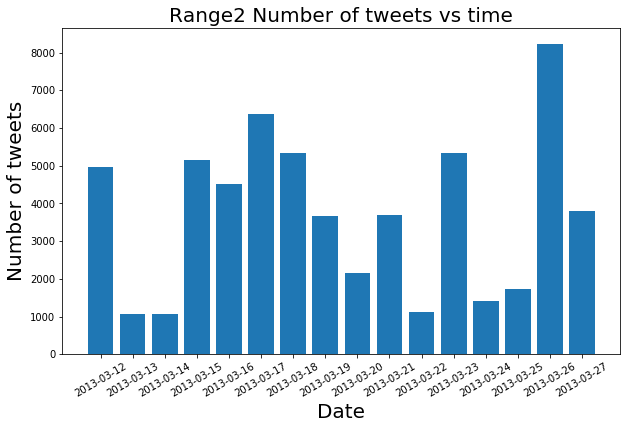

In [275]:
#plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.figure(figsize=(10,6))
plt.bar(x,y)

#plt.xlim(0,18)
plt.xticks(rotation=30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.title("Range2 Number of tweets vs time", fontsize = 20)
plt.show()

In [39]:
df_Range2[['KCA' in i for i in df_Range2['hashtags']]]

,user_created_at,user_screen_name,user_id,source,tweet_created_at,text,hashtags,mentions,tweet_lang,isretweet
1569,Tue Mar 12 01:14:09 +0000 2013,golli4m,1260778188,Twitter for iPhone,Tue Mar 12 07:31:56 +0000 2013,RT @1Direction_ahhh: ALL YOU HAVE TO DO IS RET...,"[Vote1D, VOTE1D, KCAUK, KCA, KCA1D, Vote1DUK]","[(1046127062, 1Direction_ahhh)]",en,1
1570,Tue Mar 12 01:14:09 +0000 2013,golli4m,1260778188,Twitter for iPhone,Tue Mar 12 07:31:18 +0000 2013,RT @Luv1DForeverr: Bye guys! I know you can do...,"[KCA, Vote1D]","[(2463577098, luv1dforeverr)]",en,1
1571,Tue Mar 12 01:14:09 +0000 2013,golli4m,1260778188,Twitter for iPhone,Tue Mar 12 07:31:11 +0000 2013,RT @1DVille: Directioners. Please keep voting ...,"[KCA, VOTE1D]","[(420261321, 1DVille)]",en,1
1573,Tue Mar 12 01:14:09 +0000 2013,golli4m,1260778188,Twitter for iPhone,Tue Mar 12 01:20:03 +0000 2013,RT @Niall_AndStyles: Rt \nThis\nJust\nBecause\...,"[Vote1D, KCA]","[(250950090, Niall_AndStyles)]",en,1
1575,Tue Mar 12 01:14:09 +0000 2013,golli4m,1260778188,Twitter for iPhone,Tue Mar 12 01:19:50 +0000 2013,RT @Moanialll: RT IF WANT TO SEE THIS AGAIN #V...,"[Vote1D, KCA]",[],en,1
1576,Tue Mar 12 01:14:09 +0000 2013,golli4m,1260778188,Twitter for iPhone,Tue Mar 12 01:19:28 +0000 2013,RT YOU THIRSTY BITCHES FOR A FREE FOLLOW BACK ...,"[vote1D, KCA]",[],en,0
1577,Tue Mar 12 01:14:09 +0000 2013,golli4m,1260778188,Twitter for iPhone,Tue Mar 12 01:15:59 +0000 2013,RT FOR A FREE FOLLOW BACK!!!!! #vote1D #KCA,"[vote1D, KCA]",[],en,0
4134,Tue Mar 12 16:12:00 +0000 2013,BiebsBackToMN,1262328565,Twitter for iPhone,Tue Mar 12 17:23:26 +0000 2013,RT @kidrauhlujah: #VoteBieber #KCA or youll se...,"[VoteBieber, KCA]","[(611104867, kidrauhlujah)]",en,1
4136,Tue Mar 12 16:12:00 +0000 2013,BiebsBackToMN,1262328565,Twitter for iPhone,Tue Mar 12 17:23:02 +0000 2013,RT @kidrauhlujah: keeeeeep voting #VoteBieber ...,"[VoteBieber, KCA]","[(611104867, kidrauhlujah)]",en,1
4138,Tue Mar 12 16:12:00 +0000 2013,BiebsBackToMN,1262328565,Twitter for iPhone,Tue Mar 12 16:43:09 +0000 2013,RT @kidrauhlujah: #YoureMoreAttractiveIf you #...,"[YoureMoreAttractiveIf, VoteBieber, KCA]","[(611104867, kidrauhlujah)]",en,1


In [10]:
dict_Range2_hashtags=collections.defaultdict(int)
for i in df_Range2['hashtags']:
    for j in i:
        dict_Range2_hashtags[j]+=1

In [11]:
sorted_Range2_key_list = sorted(dict_Range2_hashtags, key=lambda x:dict_Range2_hashtags[x],reverse=True)
sorted_dict_Range2_hashtags={x:dict_Range2_hashtags[x] for x in sorted_Range2_key_list}

In [34]:
sorted_dict_Range2_hashtags

{'sexy': 7722,
 'porn': 7288,
 'sex': 6857,
 'KCA': 6105,
 'hot': 6079,
 'VoteHanGeng': 2602,
 'VoteWhatMakesYouBeautiful': 1466,
 'Vote1D': 775,
 'pornstar': 685,
 'SamsungLaFleur': 498,
 'gameinsight': 318,
 'VoteHangeng': 318,
 'androidgames': 288,
 'VoteNeverEver': 242,
 'VOTE1D': 238,
 'android': 223,
 'OneDirection': 217,
 'JayAsNewAdminOfTwitterLovers': 213,
 'Android': 212,
 'VoteBieber': 211,
 'video': 198,
 'free': 197,
 'clips': 196,
 'pussy': 196,
 'videos': 196,
 'teen': 196,
 'porno': 196,
 'xxx': 196,
 'nsfw': 196,
 'VoteVictoria': 190,
 '??????': 168,
 'Androidgames': 164,
 'Gameinsight': 164,
 'kca': 163,
 '???': 154,
 '?????': 144,
 'FollowAmielCustodio': 135,
 'RT': 133,
 'VoteBTR': 131,
 'BuyTHEWAY': 127,
 'Votevictoria': 126,
 'LoveYouGuys': 125,
 'Believing': 125,
 'CautionOfficialAtSOLESLAMonApril14': 124,
 'FF': 119,
 'money': 118,
 'klip': 116,
 '???????????': 109,
 'TFB': 103,
 '????': 103,
 'openfollow': 100,
 'rt': 97,
 'KCAUK': 90,
 'teamfollowback': 85,
 '

In [35]:
aaa=[]
for i in list(sorted_dict_Range2_hashtags.keys()):
    if 'KCA' in i or 'kca' in i:
        aaa.append(i.lower())

In [36]:
set(aaa)

{'1dkca',
 '5hkcas',
 'bieberkca',
 'blackcaps',
 'btrkca',
 'cantbelievejanoskianswonakca',
 'kca',
 'kca1d',
 'kca1duk',
 'kcabieber',
 'kcamessagetobieber',
 'kcaone',
 'kcas',
 'kcatakeover',
 'kcauk',
 'mykcabiebersign',
 'mykcabiebersing',
 'vote1dforkca',
 'votebieberkca',
 'votetaylorkca'}

In [469]:
aaa2=df_Range2[['user_created_at','user_screen_name']].drop_duplicates()

In [471]:
dict_Range2_user_created_at=collections.defaultdict(int)
for i in aaa2['user_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    dict_Range2_user_created_at[datetime_string]+=1

In [483]:
x=list(dict_Range2_user_created_at.keys())

In [484]:
y=list(dict_Range2_user_created_at.values())

In [485]:
x

['2013-03-07',
 '2013-03-08',
 '2013-03-10',
 '2013-02-19',
 '2013-03-12',
 '2013-03-03',
 '2013-03-04',
 '2013-03-05',
 '2013-03-11',
 '2013-03-06',
 '2013-02-04',
 '2013-03-09',
 '2013-02-28',
 '2011-08-10',
 '2013-02-11',
 '2013-01-27',
 '2013-02-14',
 '2011-12-21',
 '2013-03-01',
 '2012-03-19',
 '2012-03-26',
 '2013-03-02',
 '2011-04-10',
 '2013-03-13',
 '2012-12-18',
 '2012-09-10',
 '2012-10-31',
 '2013-01-04',
 '2013-02-25',
 '2009-08-12',
 '2012-11-23',
 '2013-02-16',
 '2013-03-14',
 '2013-02-20',
 '2012-10-02',
 '2012-11-19',
 '2013-01-30',
 '2013-02-18',
 '2012-04-15',
 '2013-03-15',
 '2013-02-24',
 '2009-10-28',
 '2011-06-30',
 '2013-03-16',
 '2012-12-19',
 '2012-01-24',
 '2012-12-15',
 '2012-06-15',
 '2012-12-26',
 '2012-11-07',
 '2013-02-07',
 '2012-02-13',
 '2013-03-17',
 '2013-02-26',
 '2011-11-27',
 '2013-03-18',
 '2011-11-10',
 '2013-03-19',
 '2012-03-24',
 '2013-03-20',
 '2011-10-15',
 '2012-11-25',
 '2013-03-21',
 '2012-02-26',
 '2012-09-12',
 '2013-03-22',
 '2012-11-

In [486]:
y

[9,
 8,
 18,
 1,
 74,
 4,
 6,
 8,
 25,
 9,
 1,
 19,
 4,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 1,
 4,
 1,
 70,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 43,
 1,
 1,
 1,
 1,
 2,
 1,
 65,
 7,
 1,
 1,
 67,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 64,
 3,
 1,
 63,
 1,
 55,
 1,
 58,
 1,
 1,
 47,
 1,
 1,
 63,
 1,
 1,
 1,
 1,
 68,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 59,
 1,
 1,
 1,
 2,
 1,
 1,
 70,
 1,
 1,
 1,
 56,
 1,
 44,
 1,
 1]

In [489]:
sorted_x=sorted(x)

In [490]:
sorted_y=[dict_Range2_user_created_at[i] for i in sorted_x]

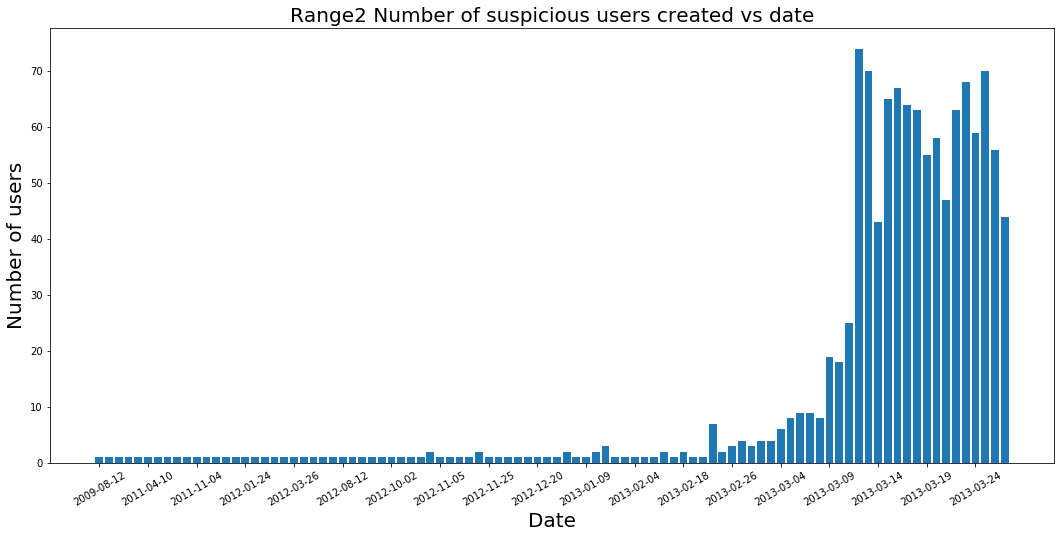

In [493]:
#plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.figure(figsize=(18,8))
plt.bar(sorted_x,sorted_y)

#plt.xlim(0,18)
plt.xticks(np.arange(0, 94, 5),[sorted_x[i] for i in range(0,94,5)],rotation=30)
#plt.xticks(rotation=90)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of users', fontsize = 20)
plt.title("Range2 Number of suspicious users created vs date", fontsize = 20)
plt.show()

#### df_Range3 with hashtags 40583 rows

In [186]:
df_Range3['user_created_at']=df_Range3['user_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [187]:
df_Range3['tweet_created_at']=df_Range3['tweet_created_at'].map(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y'))

In [74]:
min(df_Range3['tweet_created_at'])

Timestamp('2013-11-05 00:00:03')

In [75]:
max(df_Range3['tweet_created_at'])

Timestamp('2013-11-14 23:47:20')

In [100]:
array=[x for x in df_Range3['tweet_created_at']]

In [116]:
df_Range3.loc[0,'tweet_created_at'].year

2013

In [215]:
dict_Range3_tweet_created_at=collections.defaultdict(int)
for i in df_Range3['tweet_created_at']:
    datetime_string=i.strftime('%Y-%m-%d')
    dict_Range3_tweet_created_at[datetime_string]+=1

In [277]:
x=list(dict_Range3_tweet_created_at.keys())

In [278]:
y=list(dict_Range3_tweet_created_at.values())

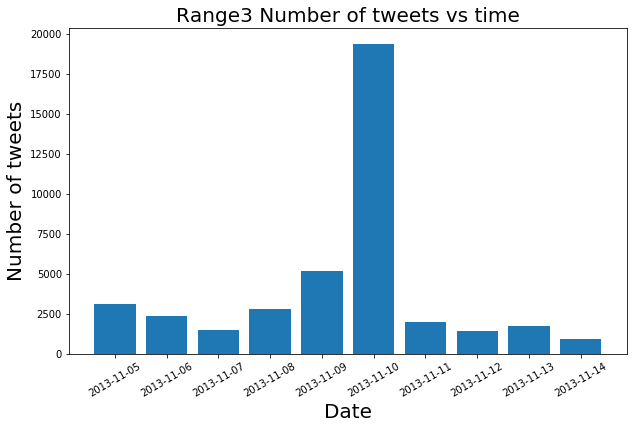

In [279]:
#plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.figure(figsize=(10,6))
plt.bar(x,y)
#plt.xlim(0,18)
plt.xticks(rotation=30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.title("Range3 Number of tweets vs time", fontsize = 20)
plt.show()

In [ ]:
字典键是'2013-11-05'这种字符串

In [211]:
df_Range3.loc[0,'tweet_created_at'].strftime('%Y-%m-%d')

'2013-11-05'

In [206]:
df_Range3.loc[0,'tweet_created_at']

Timestamp('2013-11-05 17:51:30')

In [201]:
df_Range3

,user_created_at,user_screen_name,tweet_created_at,text,hashtags
0,2013-11-04 20:20:13,yelobarbiiee,2013-11-05 17:51:30,#noregrets http://t.co/y3VV2IKE53,"{'text': 'noregrets', 'indices': [0, 10]}"
1,2013-11-04 20:20:13,yelobarbiiee,2013-11-05 17:31:17,When a bitch don't keep it real...Thats when i...,"{'text': 'RNS', 'indices': [62, 66]}"
2,2013-11-04 20:20:13,yelobarbiiee,2013-11-05 04:35:54,RT @SPITFYATHEFLAME: @yelobarbiiee Let my love...,"{'text': 'YouHaveToGetThis', 'indices': [136, ..."
3,2013-11-04 20:20:13,yelobarbiiee,2013-11-05 01:44:17,Team Tara all day @taranashaw #lhhny,"{'text': 'lhhny', 'indices': [32, 38]}"
4,2013-11-04 20:20:13,yelobarbiiee,2013-11-05 01:26:13,@IamPeterGunz #lhhny,"{'text': 'lhhny', 'indices': [14, 20]}"
5,2012-10-26 20:14:53,olympiall18w86z,2013-11-05 21:18:01,@rauhlwish stop by if you want more #followerz...,"{'text': 'followerz', 'indices': [36, 46]}"
6,2013-10-31 20:15:45,MsLouTheCavapoo,2013-11-05 16:30:57,@kellysuez left me at home alone today. Clearl...,"{'text': 'wasted', 'indices': [104, 111]}"
7,2013-11-03 16:19:59,FreeStuff4Apps,2013-11-05 01:55:54,Racing and restoring awesome cars in #CSRClass...,"{'text': 'CSRClassics', 'indices': [37, 49]}"
8,2013-11-01 16:57:42,toxicbutera33,2013-11-05 00:59:33,#votearianagrande yyy,"{'text': 'votearianagrande', 'indices': [0, 17]}"
9,2013-11-01 16:57:42,toxicbutera33,2013-11-05 00:58:35,#votearianagrande xxx,"{'text': 'votearianagrande', 'indices': [0, 17]}"


#### Hashtags Rank

In [924]:
dict_Range1_hashtags=collections.defaultdict(int)
dict_Range2_hashtags=collections.defaultdict(int)
dict_Range3_hashtags=collections.defaultdict(int)

for i in df_Range1['hashtags']:
    for j in i:
        dict_Range1_hashtags[j]+=1
    
for i in df_Range2['hashtags']:
    for j in i:
        dict_Range2_hashtags[j]+=1
    
for i in df_Range3['hashtags']:
    for j in i:
        dict_Range3_hashtags[j]+=1

In [925]:
sorted_Range1_key_list = sorted(dict_Range1_hashtags, key=lambda x:dict_Range1_hashtags[x],reverse=True)
sorted_dict_Range1_hashtags={x:dict_Range1_hashtags[x] for x in sorted_Range1_key_list}

sorted_Range2_key_list = sorted(dict_Range2_hashtags, key=lambda x:dict_Range2_hashtags[x],reverse=True)
sorted_dict_Range2_hashtags={x:dict_Range2_hashtags[x] for x in sorted_Range2_key_list}

sorted_Range3_key_list = sorted(dict_Range3_hashtags, key=lambda x:dict_Range3_hashtags[x],reverse=True)
sorted_dict_Range3_hashtags={x:dict_Range3_hashtags[x] for x in sorted_Range3_key_list}

In [926]:
x=list(sorted_dict_Range1_hashtags.keys())[:10]

In [927]:
y=list(sorted_dict_Range1_hashtags.values())[:10]

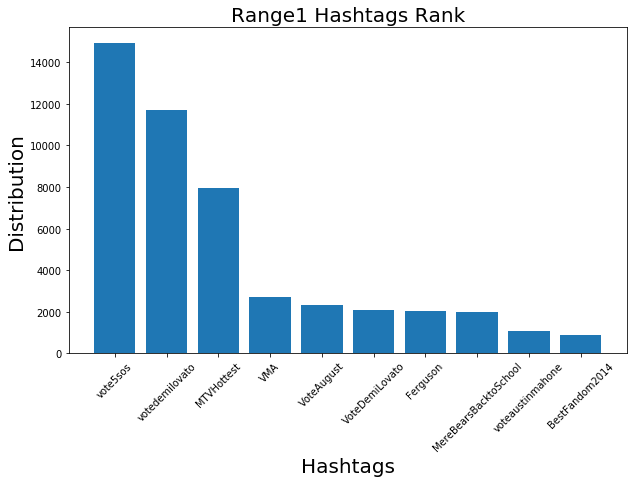

In [928]:
#plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.figure(figsize=(10,6))
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.bar(np.arange(len(x)),y)
#plt.xlim(0,18)

plt.xlabel('Hashtags', fontsize = 20)
plt.ylabel('Distribution', fontsize = 20)
plt.title("Range1 Hashtags Rank", fontsize = 20)
plt.show()

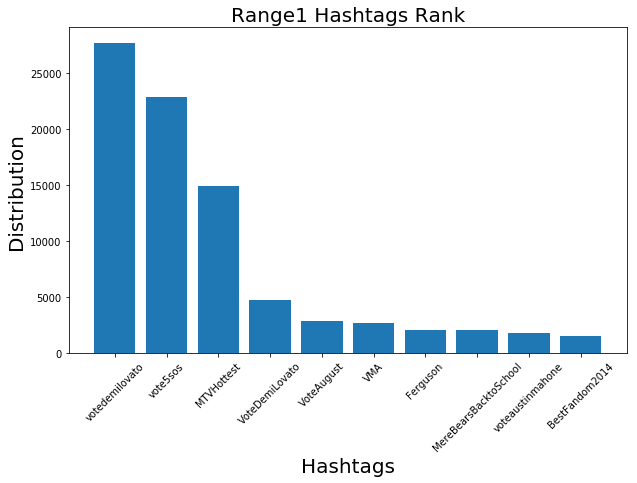

In [345]:
#plt.plot(x, y, marker='o', mec='r', mfc='w')
plt.figure(figsize=(10,6))
plt.xticks(np.arange(len(x)),x,rotation=45)
plt.bar(np.arange(len(x)),y)
#plt.xlim(0,18)

plt.xlabel('Hashtags', fontsize = 20)
plt.ylabel('Distribution', fontsize = 20)
plt.title("Range1 Hashtags Rank", fontsize = 20)
plt.show()

In [352]:
dict1=collections.defaultdict(int)
for i in range(0,len(df_Range1)):
    if df_Range1.loc[i,'hashtags']['text']=='votedemilovato':
        date_string=df_Range1.loc[i,'tweet_created_at'].strftime('%Y-%m-%d')
        dict1[date_string]+=1

In [353]:
dict1

defaultdict(int,
            {'2014-08-14': 301,
             '2014-08-15': 1131,
             '2014-08-16': 278,
             '2014-08-17': 1745,
             '2014-08-18': 1856,
             '2014-08-19': 2545,
             '2014-08-20': 2224,
             '2014-08-21': 1281,
             '2014-08-22': 2114,
             '2014-08-23': 7184,
             '2014-08-24': 7077})

In [360]:
x=list(dict_Range1_tweet_created_at.keys())

In [374]:
y=list(dict1.values())

In [376]:
y=[0 for i in range(0,26)]+y

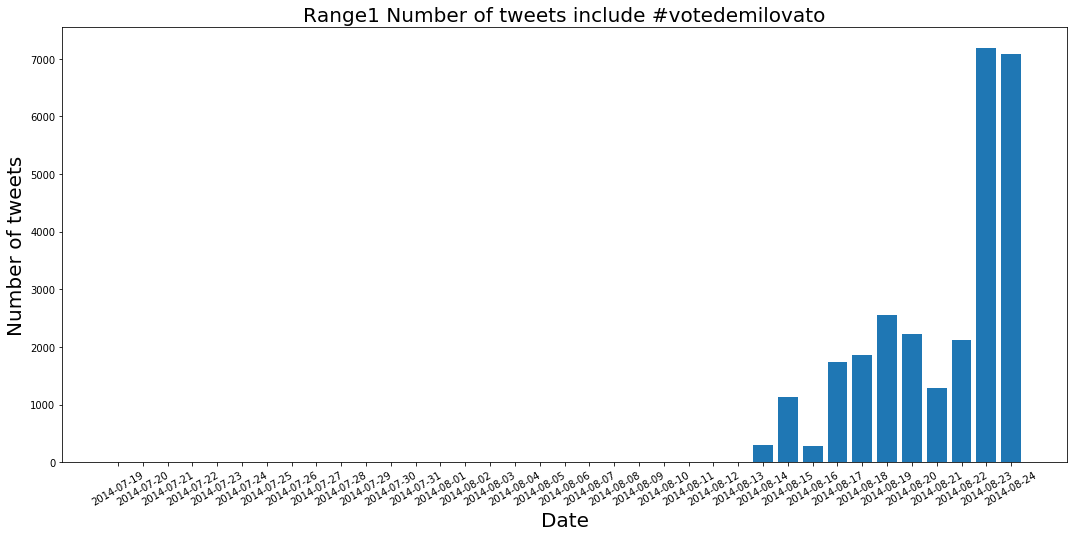

In [380]:
plt.figure(figsize=(18,8))
plt.bar(x,y)

#plt.xlim(0,18)
plt.xticks(rotation=30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.title("Range1 Number of tweets include #votedemilovato", fontsize = 20)
plt.show()

In [354]:
dict2=collections.defaultdict(int)
for i in range(0,len(df_Range1)):
    if df_Range1.loc[i,'hashtags']['text']=='vote5sos':
        date_string=df_Range1.loc[i,'tweet_created_at'].strftime('%Y-%m-%d')
        dict2[date_string]+=1

In [389]:
dict2

defaultdict(int,
            {'2014-08-14': 992,
             '2014-08-15': 1238,
             '2014-08-16': 1157,
             '2014-08-17': 866,
             '2014-08-18': 3649,
             '2014-08-19': 1613,
             '2014-08-20': 1910,
             '2014-08-21': 1366,
             '2014-08-22': 1773,
             '2014-08-23': 3311,
             '2014-08-24': 5048})

In [390]:
x=list(dict_Range1_tweet_created_at.keys())

In [391]:
y=list(dict2.values())

In [392]:
y=[0 for i in range(0,26)]+y

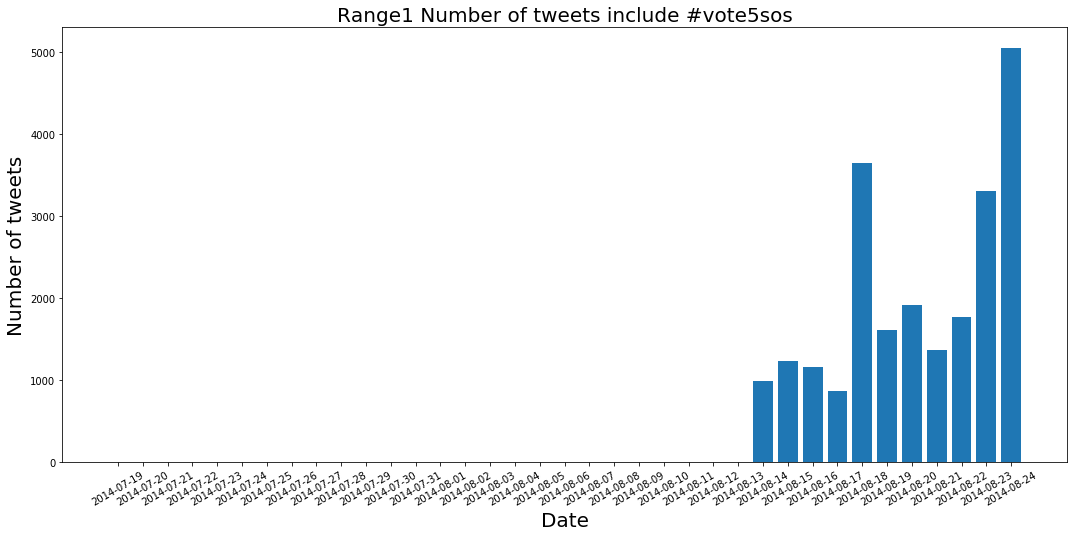

In [393]:
plt.figure(figsize=(18,8))
plt.bar(x,y)

#plt.xlim(0,18)
plt.xticks(rotation=30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.title("Range1 Number of tweets include #vote5sos", fontsize = 20)
plt.show()

In [358]:
dict3=collections.defaultdict(int)
for i in range(0,len(df_Range1)):
    if df_Range1.loc[i,'hashtags']['text']=='MTVHottest':
        date_string=df_Range1.loc[i,'tweet_created_at'].strftime('%Y-%m-%d')
        dict3[date_string]+=1

In [359]:
dict3

defaultdict(int,
            {'2014-07-19': 686,
             '2014-07-20': 1007,
             '2014-07-21': 857,
             '2014-07-22': 797,
             '2014-07-23': 377,
             '2014-07-24': 866,
             '2014-07-25': 489,
             '2014-07-26': 1913,
             '2014-07-27': 1562,
             '2014-07-28': 345,
             '2014-07-29': 564,
             '2014-07-30': 32,
             '2014-07-31': 316,
             '2014-08-01': 482,
             '2014-08-02': 29,
             '2014-08-03': 439,
             '2014-08-04': 129,
             '2014-08-05': 1,
             '2014-08-06': 1,
             '2014-08-08': 31,
             '2014-08-09': 12,
             '2014-08-10': 152,
             '2014-08-11': 44,
             '2014-08-12': 109,
             '2014-08-13': 17,
             '2014-08-14': 150,
             '2014-08-15': 535,
             '2014-08-16': 267,
             '2014-08-17': 72,
             '2014-08-18': 807,
             '2014-08-19': 574,

In [395]:
x=list(dict_Range1_tweet_created_at.keys())

In [401]:
y=list(dict3.values())

In [402]:
y.insert(19,0)

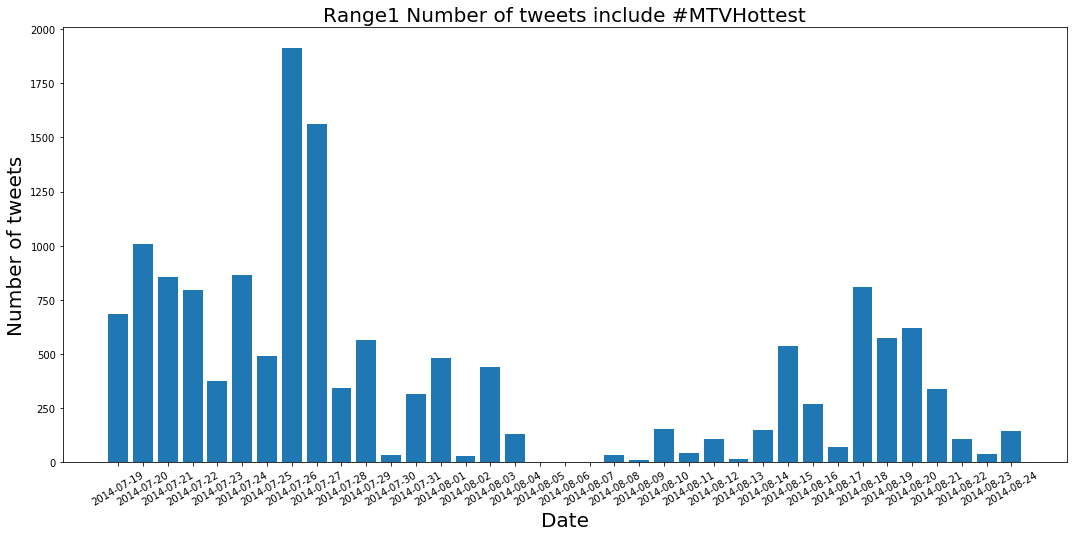

In [405]:
plt.figure(figsize=(18,8))
plt.bar(x,y)

#plt.xlim(0,18)
plt.xticks(rotation=30)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of tweets', fontsize = 20)
plt.title("Range1 Number of tweets include #MTVHottest", fontsize = 20)
plt.show()

In [109]:
MTVbot=df[df['text'].str.contains('MTV')]

In [119]:
MTVbot['text']

105                        n\n\n#MTVHottest One Direction
106                        l\n\n#MTVHottest One Direction
107                        k\n\n#MTVHottest One Direction
108                        j\n\n#MTVHottest One Direction
109                        i\n\n#MTVHottest One Direction
110                        h\n\n#MTVHottest One Direction
111                        g\n\n#MTVHottest One Direction
112                        f\n\n#MTVHottest One Direction
113                        e\n\n#MTVHottest One Direction
114                       c \n\n#MTVHottest One Direction
115                        b\n\n#MTVHottest One Direction
116                        a\n\n#MTVHottest One Direction
117                             #MTVHottest One Direction
614     RT @DxngerousHarry: Retweet If you'd cuddle wi...
618     RT @AmenaHoranYo_: RT FOR FETUS ONE DIRECTION ...
771     #MTVHottest http://t.co/FRzvxbzuvm http://t.co...
1071                 Eirh #MTVHottest 5 Seconds of Summer
1072          

In [121]:
for index in MTVbot.index:
    print(MTVbot.loc[index]['user']['screen_name'],MTVbot.loc[index]['user']['created_at'], MTVbot.loc[index]['created_at'], MTVbot.loc[index]['text'])

candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 23:13:23 n

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 23:12:37 l

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 23:10:26 k

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 23:10:04 j

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 23:09:55 i

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 17:34:56 h

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 17:34:38 g

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 17:34:15 f

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 17:34:03 e

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 2014-07-19 17:32:36 c 

#MTVHottest One Direction
candlesandwifi Thu Jun 26 02:58:03 +0000 2014 201

ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:30:14 half a heart #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:30:08 alive #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:30:02 does he know #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:29:55 why dont we go there #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:29:47 better than words #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:29:38 little white lies #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:29:31 something great #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:29:20 through the dark #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 2014 2014-07-19 19:29:13 little black dress #MTVHottest One Direction
ffvcktomlinsn Thu Feb 27 22:49:46 +0000 

In [98]:
df.iloc[10,:]['user']

{'contributors_enabled': False,
 'created_at': 'Sat Jul 19 03:28:47 +0000 2014',
 'default_profile': True,
 'default_profile_image': True,
 'description': '',
 'entities': {'description': {'urls': []}},
 'favourites_count': 0,
 'follow_request_sent': False,
 'followers_count': 0,
 'following': False,
 'friends_count': 0,
 'geo_enabled': False,
 'id': 2658538328,
 'id_str': '2658538328',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 0,
 'location': '',
 'name': 'kihytjh',
 'notifications': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_5_normal.png',
 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_5

In [72]:
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Jul 19 06:15:50 +0000 2014',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 1098359988,
    'id_str': '1098359988',
    'indices': [0, 16],
    'name': 'Amy Kan',
    'screen_name': 'dunkingd0ughnut'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 490379468590964736,
 'id_str': '490379468590964736',
 'in_reply_to_screen_name': 'dunkingd0ughnut',
 'in_reply_to_status_id': 490378948971216897,
 'in_reply_to_status_id_str': '490378948971216897',
 'in_reply_to_user_id': 1098359988,
 'in_reply_to_user_id_str': '1098359988',
 'lang': 'en',
 'place': None,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'text': '@dunkingd0ughnut LOL WHAT',
 'truncated': False,
 'user': {'contributors_enabled': False,
  'created_at': 'Mon Jul 14 08:04:13 +0000 2014',
  'default_profile': True,
  '

#### 正则表达式测试

@asdsfdf sdsafef http://t.co/astxhtnc adsfgtg @
[a-zA-z]+://[^\s]*(.)*@|@(.)*[a-zA-z]+://[^\s]*